# Comparing variabilities between ONI/ENSO and GRACE's Total Water Storage in South America 
## VCM-02 Internship Final Report

### Andyara Callegare
### oliveiracallegare@uni-potsdam.de


### Introduction

The El Nino-Southern Oscillation (ENSO) is the dominant interannual variability of Earth’s climate system and plays a central role in global climate prediction. Outlooks of ENSO and its impacts often follow a two-tier approach: predicting ENSO sea surface temperature anomaly in tropical Pacific and then predicting its global impacts(Lin & Qian, 2019). El Niño and La Niña events denote sea-surface temperature (SST) conditions in the tropical Pacific that are, respectively, warmer and colder than average (McPhaden et al., 2006), as seen in Figure 1 by Chiodi & Harrison, 2015.

<img src='../figures/fig1.png'>
Figure 1

Muñoz et al., 2016, describes the effects of this system in South America, Figure 2, El Niño to the left and La Niña to the right. In general during El Niño the region of the Amazon basin tends to be dry and the region of La Plata wet. During La Niña the opposite behaviour is expected

<img src='../figures/fig2.png'>
Figure 2

The unique Gravity Recovery and Climate Experiment (GRACE) and its successor Gravity Recovery and Climate Experiment-Follow-On (GRACE-FO) have been orbiting the earth since 2002 with a unique way of using gravity to map water masses and their changes. Its variable Total Water Storage (TWS) change is defined as changes in water stored on the surface (e.g., lakes and reservoirs, rivers, and snow water equivalent), over the entire soil profile, and in groundwater (Long et al., 2015). 

Since the primary contribution to TWS is rainfall some relation between ENSO and GRACE's TWS is expected, but in this study, we raised a few research questions: 

a) What are the seasonal patterns of GRACE and GRACE-FO for the two major South American basins?

b) Can GRACE be fit into a sine model? 

c) Does the trend in GRACE relates to ENSO signals?

### WMO Basins

The study area comprehends the 2 biggest major river basins from South America, Amazon and Rio de La Plata.
The geometry was extracted from the WMO Basins 3rd, revised and extended edition 2020, available at https://www.bafg.de/GRDC/EN/02_srvcs/22_gslrs/223_WMO/wmo_regions_node.html#doc2763412bodyText7.

The major basins were calculated by dissolving the ‘WMOBB_BASI’ attribute and summoning the ‘Shape_Area’. 

Suth America has 43 major basins.

Amazon has aproximatelly 4.9 M km2, followed by Rio de La Plata with 3.0 M km2.

In [1]:
import geopandas as gpd
from shapely.geometry import Polygon

# open file
world_basins = gpd.read_file('../data/external/wmo_basins_shp/wmobb_basins.shp')

In [2]:
world_basins

,WMOBB,WMOBB_NAME,WMOBB_BASI,WMOBB_SUBB,WMOBB_DESC,REGNUM,REGNAME,WMO306_MoC,WMO306_M_1,SUM_SUB_AR,Shape_Leng,Shape_Area,geometry
0,101,MEDJERDA (also MAJARDAH),MEDJERDA (also MAJARDAH),---,Medjerda river basin,1,Africa,1,Mejerda,23171.5,11.762517,2.320339,"POLYGON ((10.17917 37.12083, 10.17881 37.11841..."
1,102,MELRHIR and RHARSA,MELRHIR and RHARSA,---,"Chott el Rharsa interior basin, Chott Melrhir ...",1,Africa,2,Ch. Melrhir and el Rharsa,260760.5,39.683524,25.182484,"POLYGON ((2.64583 30.12917, 2.64466 30.13374, ..."
2,103,DJERID,DJERID,---,Chott el Djerid interior basin,1,Africa,3,Ch. El Djerid,59021.0,13.773538,5.687699,"POLYGON ((10.11667 32.43750, 10.11008 32.43785..."
3,104,"Mediterranean Sea (ex 161, 627, 928, 691, 693)",Mediterranean Sea,---,basins draining into Mediterranean Sea between...,1,Africa,4,Algerian coast,146658.8,55.448069,14.626120,"MULTIPOLYGON (((-2.43694 35.17975, -2.43889 35..."
4,105,HODNA,HODNA,---,Chott el Hodna interior basin,1,Africa,5,Ch. El Hodna,34051.7,11.808258,3.374844,"POLYGON ((6.03750 35.58750, 5.99583 35.58750, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
511,698,Greenland,Greenland,---,basins on Greenland island,6,Europe,98,---,2146715.6,1426.834686,662.170443,"MULTIPOLYGON (((-43.89015 59.74503, -43.89306 ..."
512,571,Hawaiian Islands,Hawaiian Islands,---,basins on Hawaiian islands,5,South-West Pacific,71,Hawaii,0.0,11.956685,1.429011,"MULTIPOLYGON (((-159.33797 21.95150, -159.4423..."
513,573,"Polynesia (ex 563, 564, 565, 566, 567, 571)",Polynesia,---,"basins on Polynesia islands, except Hawaiian i...",5,South-West Pacific,73,---,0.0,11.708155,0.528264,"MULTIPOLYGON (((-176.63109 0.79542, -176.63617..."
514,295,EUPHRATES and TIGRIS in Asia,EUPHRATES and TIGRIS in Asia,---,"Euphrates river basin in Asia, Tigris river ba...",2,Asia,95,spare,544990.4,54.195426,52.631828,"POLYGON ((48.45833 29.99167, 48.45798 29.99409..."


In [3]:
# select attributes
world_basins = world_basins[['REGNAME','WMOBB_BASI', 'geometry', 'Shape_Area']]

# get only SA basins
SA_basins_minor = world_basins[world_basins['REGNAME'] == "South America"] 

# dissolve to only the major basins
# function sum to get all the area of the basins
SA_basins = SA_basins_minor.dissolve(by='WMOBB_BASI', aggfunc='sum') 

# organize as descending order of area
SA_basins.sort_values(by=['Shape_Area'], inplace=True, ascending=False)

# save file
SA_basins.to_file('../data/processed/basinsSA/basins_dissolved.shp')

In [4]:
# open saved file
SA_basins = gpd.read_file('../data/processed/basinsSA/basins_dissolved.shp')

In [5]:
# show attribute table
SA_basins

,WMOBB_BASI,Shape_Area,geometry
0,AMAZON (also Amazonas),488.059318,"POLYGON ((-69.16250 -14.76250, -69.16285 -14.7..."
1,RIO DE LA PLATA,300.079899,"MULTIPOLYGON (((-58.40417 -34.26250, -58.40525..."
2,South Atlantic,179.752634,"MULTIPOLYGON (((-69.32575 -55.84509, -69.32639..."
3,South Pacific,90.886759,"MULTIPOLYGON (((-72.95360 -54.44320, -72.95482..."
4,ORINOCO,76.569883,"POLYGON ((-74.21667 4.01250, -74.21752 4.01582..."
5,TOCANTINS,63.831247,"POLYGON ((-48.85833 -4.67083, -48.85769 -4.672..."
6,"SALADO (also DESAGUADERO also BERMEJO), COLORA...",53.628740,"POLYGON ((-68.79252 -27.76335, -68.79167 -27.7..."
7,SAO FRANCISCO,53.093711,"POLYGON ((-38.71667 -7.62500, -38.71591 -7.628..."
8,North Atlantic,34.620066,"MULTIPOLYGON (((-49.32119 -1.65209, -49.32222 ..."
9,CHUBUT and DESEADO and CHICO and SANTA CRUZ an...,29.940542,"MULTIPOLYGON (((-71.98529 -47.70473, -71.97991..."


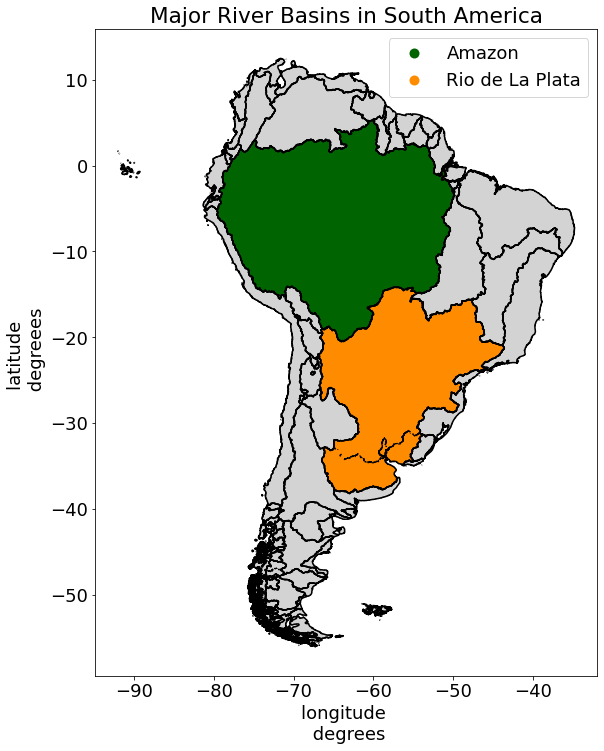

In [6]:
# plot SA basins
import matplotlib.pyplot as plt 
from matplotlib.colors import ListedColormap
plt.rcParams.update({'font.size': 18})

# plot
fig, ax = plt.subplots(figsize=(9,12))

# plot unused basins
cmap_lightgray = ListedColormap(['lightgray']) # cmap with light gray
SA_basins.plot(ax=ax, column='WMOBB_BASI', cmap=cmap_lightgray, legend=False)


# plot used basins
cmap_basins = ListedColormap(['darkgreen', 'darkorange']) # cmap for the used basins
SA_basins[0:2].plot(ax=ax, column='WMOBB_BASI', cmap=cmap_basins, legend=True)
SA_basins.boundary.plot(ax = ax, edgecolor="black")

# legend
leg = ax.get_legend()

# write legend in a prettier way
leg.get_texts()[0].set_text('Amazon')
leg.get_texts()[1].set_text('Rio de La Plata')

# Title and axis
plt.title('Major River Basins in South America')
plt.xlabel('longitude \n degrees')
plt.ylabel('latitude \n degreees')

# save figure
plt.savefig('../figures/01_basins.png',bbox_inches = 'tight', dpi=600)

### ONI

The Oceanic Niño Index (ONI) is NOAA's primary indicator for monitoring El Niño and La Niña, which are opposite phases of the climate pattern called the El Niño-Southern Oscillation, or “ENSO” for short. NOAA considers El Niño conditions to be present when the Oceanic Niño Index is +0.5 or higher, indicating the east-central tropical Pacific is significantly warmer than usual.  La Niña conditions exist when the Oceanic Niño Index is -0.5 or lower, indicating the region is cooler than usual. The dataset is avaliable at https://www.cpc.ncep.noaa.gov/data/indices/oni.ascii.txt

The ONI tracks the running 3-month average sea surface temperatures in the east-central tropical Pacific between 120°-170°W. This area is called the Niño 3.4 region. 

<img src='../figures/fig3.png'>
Figure 3
The data uses a 3 months mean abreviation with letters, this information was translated into a datetime with the central month.


In [7]:
import pandas as pd

# open file
oni = pd.read_csv('../data/external/oni/oni.ascii.txt', sep = '\s+')

In [8]:
oni

,SEAS,YR,TOTAL,ANOM
0,DJF,1950,24.72,-1.53
1,JFM,1950,25.17,-1.34
2,FMA,1950,25.75,-1.16
3,MAM,1950,26.12,-1.18
4,AMJ,1950,26.32,-1.07
...,...,...,...,...
849,SON,2020,25.54,-1.17
850,OND,2020,25.40,-1.27
851,NDJ,2020,25.43,-1.19
852,DJF,2021,25.59,-1.05


In [9]:
# transform seasonal abreviation to datetime
import datetime

# define function to translate central month as datetime month, day ios fixed to 15
def oni2datetime(SEAS,yy):
    if SEAS =='DJF':
        mm = 1
    elif SEAS == 'JFM':
        mm = 2
    elif SEAS == 'FMA':
        mm = 3
    elif SEAS == 'MAM':
        mm = 4
    elif SEAS == 'AMJ':
        mm = 5
    elif SEAS == 'MJJ':
        mm = 6
    elif SEAS == 'JJA':
        mm = 7
    elif SEAS == 'JAS':
        mm = 8
    elif SEAS == 'ASO':
        mm = 9
    elif SEAS == 'SON':
        mm = 10
    elif SEAS == 'OND':
        mm = 11
    elif SEAS == 'NDJ':
        mm = 12

    return datetime.datetime(yy,mm,15)

# apply function
dates = []
for i in iter(range(0,len(oni))):
    dates.append(oni2datetime(oni.SEAS[i],oni.YR[i]))

oni['dates'] = dates

# reindex to datetime
oni.index = oni.dates

In [10]:
# show table
oni

,SEAS,YR,TOTAL,ANOM,dates
dates,,,,,
1950-01-15,DJF,1950,24.72,-1.53,1950-01-15
1950-02-15,JFM,1950,25.17,-1.34,1950-02-15
1950-03-15,FMA,1950,25.75,-1.16,1950-03-15
1950-04-15,MAM,1950,26.12,-1.18,1950-04-15
1950-05-15,AMJ,1950,26.32,-1.07,1950-05-15
...,...,...,...,...,...
2020-10-15,SON,2020,25.54,-1.17,2020-10-15
2020-11-15,OND,2020,25.40,-1.27,2020-11-15
2020-12-15,NDJ,2020,25.43,-1.19,2020-12-15


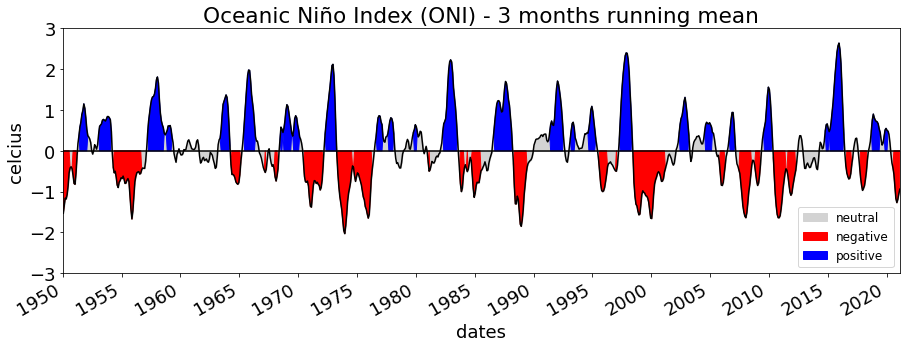

In [11]:
import matplotlib.dates as mdates
import numpy as np

# plot ONI
fig, ax = plt.subplots(figsize=(15,5))

plt.plot(oni.index, oni.ANOM, color = 'k')

# horizontal line in 0
plt.axhline(y=0, color = 'k')

# fill values in gray, neutral years
plt.fill_between(oni.index, oni.ANOM, 0,
                color='lightgray', interpolate=True, label = 'neutral')

# fill values <0.5 in red, la nina
plt.fill_between(oni.index, oni.ANOM, 0,
                 where=(oni.ANOM <= -0.5),
                color='r', interpolate=True, label = 'negative')

# fill values >0.5 in blue, el nino
plt.fill_between(oni.index, oni.ANOM, 0,
                 where=(oni.ANOM >= 0.5),
                 color='b', interpolate=True, label = 'positive')



# format dates x axis
ax.xaxis_date()
years =mdates.YearLocator(5)
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
ax.set_xlim(pd.Timestamp("1950-01-01"),pd.Timestamp("2021-02-15"))
fig.autofmt_xdate()
plt.xlabel('dates')

# format y label
plt.yticks(np.arange(-3, 4, 1)) 
plt.ylabel('celcius')

# Title and axis
plt.title('Oceanic Niño Index (ONI) - 3 months running mean')

# legend 
plt.legend(prop={'size':12})

# save figure
plt.savefig('../figures/02_oni.png',bbox_inches = 'tight', dpi=600)

In [12]:
# find highest months
oni_positive = oni[oni.ANOM>0.5]
oni_positive = oni_positive.sort_values('ANOM', ascending=False)

oni_positive[0:10]

,SEAS,YR,TOTAL,ANOM,dates
dates,,,,,
2015-12-15,NDJ,2015,29.26,2.64,2015-12-15
2015-11-15,OND,2015,29.25,2.57,2015-11-15
2016-01-15,DJF,2016,29.12,2.48,2016-01-15
2015-10-15,SON,2015,29.14,2.42,2015-10-15
1997-11-15,OND,1997,29.02,2.40,1997-11-15
1997-12-15,NDJ,1997,28.97,2.39,1997-12-15
1997-10-15,SON,1997,29.01,2.33,1997-10-15
1998-01-15,DJF,1998,28.87,2.24,1998-01-15
1982-12-15,NDJ,1982,28.76,2.23,1982-12-15


In [13]:
oni_positive_10 = oni_positive[0:10]
oni_positive_10 = oni_positive_10.sort_index()
oni_positive_10

,SEAS,YR,TOTAL,ANOM,dates
dates,,,,,
1982-12-15,NDJ,1982,28.76,2.23,1982-12-15
1983-01-15,DJF,1983,28.79,2.18,1983-01-15
1997-10-15,SON,1997,29.01,2.33,1997-10-15
1997-11-15,OND,1997,29.02,2.40,1997-11-15
1997-12-15,NDJ,1997,28.97,2.39,1997-12-15
1998-01-15,DJF,1998,28.87,2.24,1998-01-15
2015-10-15,SON,2015,29.14,2.42,2015-10-15
2015-11-15,OND,2015,29.25,2.57,2015-11-15
2015-12-15,NDJ,2015,29.26,2.64,2015-12-15


In [14]:
# oni[(oni.index >= '1982-04')& (oni.index <= '1983-09')]
# oni[(oni.index >= '1997-04')& (oni.index <= '1998-06')]
# oni[(oni.index >= '2014-09')& (oni.index <= '2016-06')]

The highest 10 months have anomalies ranging from 2.18 to 2.64 °C. These values are divided into 3 episodes.

The most intense one has its peak in 1982-12, values above 0.5 started in 1982-05 and were continuously above this threshold until 1983-08, 15 months in total. The two highest values were registered during this episode.

The second most intense episode has its peak in 1997-10, values above 0.5 started in 1997-05 and were continuously above this threshold until 1998-04, 12 months in total. The 3rd to 6th highest values were registered during this episode.

And the third one has its peak in 2015-12, values above 0.5 started in 2014-10 and were continuously above this threshold until 2016-04, 19 months in total. The 7th to 10th highest values were registered during this episode. 

In [15]:
# find lowest months
oni_negative = oni[oni.ANOM<0.5]
oni_negative = oni_negative.sort_values('ANOM', ascending=True)

oni_negative[0:10]

,SEAS,YR,TOTAL,ANOM,dates
dates,,,,,
1973-12-15,NDJ,1973,24.38,-2.03,1973-12-15
1973-11-15,OND,1973,24.47,-1.95,1973-11-15
1988-12-15,NDJ,1988,24.63,-1.85,1988-12-15
1974-01-15,DJF,1974,24.64,-1.84,1974-01-15
1988-11-15,OND,1988,24.71,-1.80,1988-11-15
1973-10-15,SON,1973,24.71,-1.71,1973-10-15
1989-01-15,DJF,1989,24.84,-1.69,1989-01-15
1955-11-15,OND,1955,24.41,-1.67,1955-11-15
2000-01-15,DJF,2000,24.96,-1.66,2000-01-15


In [16]:
oni_negative_10 = oni_negative[0:10]
oni_negative_10 = oni_negative_10.sort_index()
oni_negative_10

,SEAS,YR,TOTAL,ANOM,dates
dates,,,,,
1955-11-15,OND,1955,24.41,-1.67,1955-11-15
1973-10-15,SON,1973,24.71,-1.71,1973-10-15
1973-11-15,OND,1973,24.47,-1.95,1973-11-15
1973-12-15,NDJ,1973,24.38,-2.03,1973-12-15
1974-01-15,DJF,1974,24.64,-1.84,1974-01-15
1988-11-15,OND,1988,24.71,-1.80,1988-11-15
1988-12-15,NDJ,1988,24.63,-1.85,1988-12-15
1989-01-15,DJF,1989,24.84,-1.69,1989-01-15
1999-12-15,NDJ,1999,24.93,-1.65,1999-12-15


In [17]:
# oni[(oni.index >= '1954-04')& (oni.index <= '1956-10')]
# oni[(oni.index >= '1973-04')& (oni.index <= '1976-05')]
# oni[(oni.index >= '1988-04')& (oni.index <= '1989-06')]
# oni[(oni.index >= '1998-06')& (oni.index <= '2001-03')]

The lowest 10 months have anomalies ranging from -2.03 to -1.65 °C. These values are divided into 4 episodes.

The most intense one has its peak in 1955-11, values below -0.5 started in 1954-05 and were continuously below this threshold until 1956-08, 28 months in total. The lowest value was registered during this episode.

The second most intense episode has its peak in 1973-11, values below -0.5 started in 1973-05 and were continuously below this threshold until 1976-03, 35 months in total. The 1st, 2nd, 4th and 6th lowest values were registered during this episode.

The third most intense has its peak in 1988-12, values below -0.5 started in 1988-05 and were continuously below this threshold until 1989-05, 13 months in total. The 3rd, 5th and 7th lowest values were registered during this episode. 

And the fourth most intense episode has its peak in  2000-01, values bellow -0.5 started in 1998-06 and were continuously below this threshold until 2001-02, 31 months. The 9th and 10th lowest values were registered during this episode.

Positive episodes have a higher amplitude and shorter length compared with the positive ones.

### GRACE and GRACE-FO

The Gravity Recovery and Climate Experiment (GRACE) and the Gravity Recovery and Climate Experiment Follow-On (GRACE-FO) missions are a partnership between NASA and the German Research Centre for Geosciences (GFZ). GRACE-FO, 2018- onwards, is a successor to the original GRACE mission that orbited the earth from 2002-2017. These satellites map the gravity field, and since the surface changes at a very slow rate in comparison with water, these monthly changes are mostly attributed to water moving over and below the surface and on the oceans. Data was acquired from the PO.DAAC Drive (https://podaac-tools.jpl.nasa.gov/drive/files/allData/grace/L3/land_mass/RL06/v03/ and https://podaac-tools.jpl.nasa.gov/drive/files/allData/gracefo/L3/land_mass/RL06/v03/) for all the different centres' solutions processing: Center for Space Research (CSR), the Jet Propulsion Laboratory (JPL) and GFZ. The monthly data has a spatial resolution of 1° latitude x 1°longitude for all the landmasses. The variable total water storage anomalies (TWS) represents the anomalies of the sums the total of the water mass contained in different hydrological reservoirs, including surface, soil moisture, groundwater, and snowpack component (Hasan et al., 2019). A spatial sum for the area inside of the shapefile (and individual geometries) was performed, resulting in a time series of 163 months for GRACE, starting from April 2002 to June 2017; and for GRACE-FO a time series of 31 months, starting from June 2018 to February 2021.

These two datasets were merged together, the time between GRACE and GRACE-FO (06-2017 to 06-2018) is left empty.
Then the following analysis was made:
- Compare different solutions (CSR, JPL, GFZ);
- Extract TWS within the desired Basins;
- Fill empty months with zero;
- Fit observations into a sine model;
- Decompose both observation and model;
- Compare both observation and model against ONI.


In [18]:
import glob
import xarray as xr
from tqdm import tqdm
import numpy as np

In [19]:
# GRACE
## CSR
list_gr_csr = glob.glob('../data/external/grace/land_mass/RL06/v03/CSR/*.nc')
list_gr_csr.sort()
gr_csr = xr.open_mfdataset(list_gr_csr,combine='by_coords')

## JPL
list_gr_jpl = glob.glob('../data/external/grace/land_mass/RL06/v03/JPL/*.nc')
list_gr_jpl.sort()
gr_jpl = xr.open_mfdataset(list_gr_jpl,combine='by_coords')

## GFZ
list_gr_gfz = glob.glob('../data/external/grace/land_mass/RL06/v03/GFZ/*.nc')
list_gr_gfz.sort()
gr_gfz = xr.open_mfdataset(list_gr_gfz,combine='by_coords')

<xarray.Dataset>
Dimensions:        (bounds: 2, lat: 180, lon: 360, time: 163)
Coordinates:
  * lon            (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * lat            (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * time           (time) datetime64[ns] 2002-04-18 ... 2017-06-10T12:00:00
Dimensions without coordinates: bounds
Data variables:
    lwe_thickness  (time, lat, lon) float64 dask.array<chunksize=(1, 180, 360), meta=np.ndarray>
    lat_bounds     (time, lat, bounds) float64 dask.array<chunksize=(1, 180, 2), meta=np.ndarray>
    lon_bounds     (time, lon, bounds) float64 dask.array<chunksize=(1, 360, 2), meta=np.ndarray>
    time_bounds    (time, bounds) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
Attributes: (12/59)
    _NCProperties:              version=1|netcdflibversion=4.6.1|hdf5libversi...
    Metadata_Conventions:       CF-1.6
    Conventions:                CF-1.6
    standard_name_vocabulary:   CF-1.6
    title

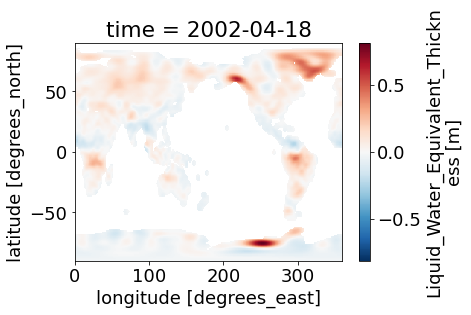

In [20]:
# check file
print(gr_csr)

gr_csr.lwe_thickness[0].plot()

Everything is alright with this file: coordinates are ok, lwe_thickness is within range, and time is also correct.
xr.open_mfdataset performed as expected.
The Longitude convention for this file goes from 0 to 360. I'll change to -180 to 180 later.

In [21]:
# GRACE-FO
## CSR
list_gf_csr = glob.glob('../data/external/gracefo/land_mass/RL06/v03/CSR/*.nc')
list_gf_csr.sort()
gf_csr_datsets=[]
for datefile in tqdm(list_gf_csr):
    file = xr.open_dataset(datefile)
    gf_csr_datsets.append(file)
gf_csr = xr.merge(gf_csr_datsets)

## JPL
list_gf_jpl = glob.glob('../data/external/gracefo/land_mass/RL06/v03/JPL/*.nc')
list_gf_jpl.sort()
gf_jpl_datsets=[]
for datefile in tqdm(list_gf_jpl):
    file = xr.open_dataset(datefile)
    gf_jpl_datsets.append(file)
gf_jpl = xr.merge(gf_jpl_datsets)

## GFZ
list_gf_gfz = glob.glob('../data/external/gracefo/land_mass/RL06/v03/GFZ/*.nc')
list_gf_gfz.sort()
gf_gfz_datsets=[]
for datefile in tqdm(list_gf_gfz):
    file = xr.open_dataset(datefile)
    gf_gfz_datsets.append(file)
gf_gfz = xr.merge(gf_gfz_datsets)


100%|██████████| 31/31 [00:00<00:00, 72.56it/s] 


<xarray.Dataset>
Dimensions:        (bounds: 2, lat: 312, lon: 520, time: 31)
Coordinates:
  * lat            (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 88.5 89.5
  * lon            (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 358.5 358.5 359.5 359.5
  * time           (time) datetime64[ns] 2018-06-16 2018-07-10 ... 2021-02-15
Dimensions without coordinates: bounds
Data variables:
    lwe_thickness  (time, lat, lon) float64 0.05402 0.05409 0.05417 ... nan nan
    lat_bounds     (lat, bounds) float64 -90.0 -89.0 -89.0 ... 89.0 89.0 90.0
    lon_bounds     (lon, bounds) float64 0.0 1.0 1.0 2.0 ... 360.0 359.0 360.0
    time_bounds    (time, bounds) datetime64[ns] 2018-06-01 ... 2021-03-01


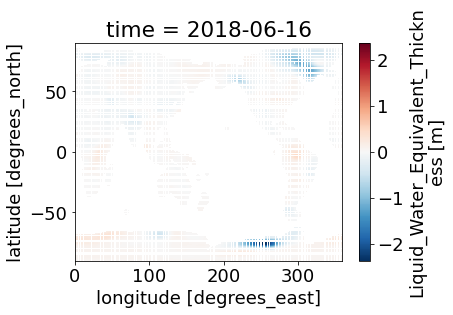

In [22]:
# check file
print(gf_csr)

gf_csr.lwe_thickness[0].plot()

In [23]:
print(gf_csr.lat.values[0:10])

print(gf_csr.lon.values[0:10])

[-89.5 -88.5 -87.5 -86.5 -85.5 -85.5 -84.5 -84.5 -83.5 -83.5]
[0.5 1.5 2.5 3.5 4.5 5.5 5.5 6.5 6.5 7.5]


This file has some weird behaviour going on, the coordinates are striped, the dimension of the value is way greater than for each file.
For each individual file, it was expected a grid of 180 x 360, but the merged file returned 312 x 520. 
xr.open_mfdataset is repeating some coordinates while performing the merge. 
One way to fix this behaviour is to open each file individually and appending it to an empty data frame and then format it to a NetCDF file. This operation is gonna be performed for GRACE and GRACE-FO datasets, returning one single unique file for each centre solution.



In [24]:
# to correct that error files are gonna be open one by one and then appended into a single final file containing both GRACE and GRACE-FO 
## CRS
### list files
list_gr_csr = glob.glob('../data/external/grace/land_mass/RL06/v03/CSR/*.nc')
list_gr_csr.sort()

list_gf_csr = glob.glob('../data/external/gracefo/land_mass/RL06/v03/CSR/*.nc')
list_gf_csr.sort()

### join list together
list_csr = list_gr_csr + list_gf_csr

### open first file as a template
data = xr.open_dataset(list_csr[0])

### create netcdf with the desired dimentions and type
nc = np.zeros([len(list_csr), data.lwe_thickness.values.shape[1], data.lwe_thickness.values.shape[2]])
time = np.zeros(len(list_csr), dtype='datetime64[s]')

### loop through all the files
for i in tqdm(range(0,len(list_csr))):
    data = xr.open_dataset(list_csr[i])
    nc[i] = data.lwe_thickness.values
    time[i] = data.time.values[0]

### create netcdf file
var = xr.DataArray(nc, dims=['time','lat', 'lon'],
                   coords={'time': time, 'lat': data.lat.values, 'lon': data.lon.values})
csr = var.to_dataset(name = 'lwe_thickness')
csr['lon'].attrs = data.lon.attrs
csr['lat'].attrs = data.lat.attrs
csr['time'].attrs = data.time.attrs
csr['lwe_thickness'].attrs = data.lwe_thickness.attrs


## JPL
### list files
list_gr_jpl = glob.glob('../data/external/grace/land_mass/RL06/v03/JPL/*.nc')
list_gr_jpl.sort()

list_gf_jpl = glob.glob('../data/external/gracefo/land_mass/RL06/v03/JPL/*.nc')
list_gf_jpl.sort()

### join list together
list_jpl = list_gr_jpl + list_gf_jpl

### open first file as a template
data = xr.open_dataset(list_jpl[0])

### create netcdf with the desired dimentions and type
nc = np.zeros([len(list_jpl), data.lwe_thickness.values.shape[1], data.lwe_thickness.values.shape[2]])
time = np.zeros(len(list_jpl), dtype='datetime64[s]')

### loop through all the files
for i in tqdm(range(0,len(list_jpl))):
    data = xr.open_dataset(list_jpl[i])
    nc[i] = data.lwe_thickness.values
    time[i] = data.time.values[0]

### create netcdf file
var = xr.DataArray(nc, dims=['time','lat', 'lon'],
                   coords={'time': time, 'lat': data.lat.values, 'lon': data.lon.values})
jpl = var.to_dataset(name = 'lwe_thickness')
jpl['lon'].attrs = data.lon.attrs
jpl['lat'].attrs = data.lat.attrs
jpl['time'].attrs = data.time.attrs
jpl['lwe_thickness'].attrs = data.lwe_thickness.attrs

## GFZ
### list files
list_gr_gfz = glob.glob('../data/external/grace/land_mass/RL06/v03/GFZ/*.nc')
list_gr_gfz.sort()

list_gf_gfz = glob.glob('../data/external/gracefo/land_mass/RL06/v03/GFZ/*.nc')
list_gf_gfz.sort()

### join list together
list_gfz = list_gr_gfz + list_gf_gfz

### open first file as a template
data = xr.open_dataset(list_gfz[0])

### create netcdf with the desired dimentions and type
nc = np.zeros([len(list_gfz), data.lwe_thickness.values.shape[1], data.lwe_thickness.values.shape[2]])
time = np.zeros(len(list_gfz), dtype='datetime64[s]')

### loop through all the files
for i in tqdm(range(0,len(list_gfz))):
    data = xr.open_dataset(list_gfz[i])
    nc[i] = data.lwe_thickness.values
    time[i] = data.time.values[0]

### create netcdf file
var = xr.DataArray(nc, dims=['time','lat', 'lon'],
                   coords={'time': time, 'lat': data.lat.values, 'lon': data.lon.values})
gfz = var.to_dataset(name = 'lwe_thickness')
gfz['lon'].attrs = data.lon.attrs
gfz['lat'].attrs = data.lat.attrs
gfz['time'].attrs = data.time.attrs
gfz['lwe_thickness'].attrs = data.lwe_thickness.attrs

100%|██████████| 194/194 [00:02<00:00, 87.48it/s] 


<xarray.Dataset>
Dimensions:        (lat: 180, lon: 360, time: 194)
Coordinates:
  * time           (time) datetime64[ns] 2002-04-18 ... 2021-02-15
  * lat            (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon            (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
Data variables:
    lwe_thickness  (time, lat, lon) float64 -0.02797 -0.02799 -0.028 ... nan nan


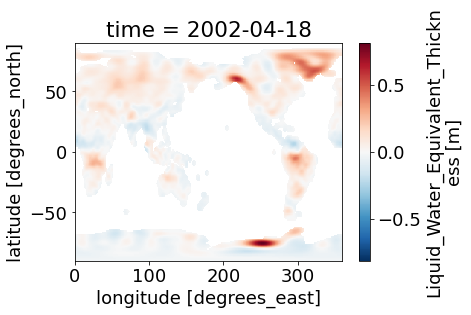

In [25]:
# check file
print(csr)

csr.lwe_thickness[0].plot()

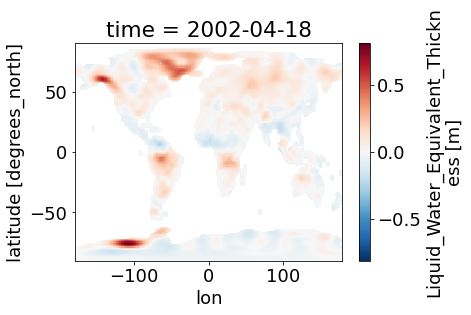

In [26]:
# convert longitude to -180 180 range
csr = csr.assign_coords(lon=(((csr.lon + 180) % 360) - 180)).sortby('lon')
jpl = jpl.assign_coords(lon=(((jpl.lon + 180) % 360) - 180)).sortby('lon')
gfz = gfz.assign_coords(lon=(((gfz.lon + 180) % 360) - 180)).sortby('lon')

# plot
csr.lwe_thickness[0].plot()

Now, this file has the correct dimensions, lwe_thickness is within range, and the time is also correct.
The files are gonna be saved to avoid reprocessing.

In [27]:
# save files
csr.to_netcdf('../data/processed/crs.nc') #golbal dataset
jpl.to_netcdf('../data/processed/jpl.nc') #golbal dataset
gfz.to_netcdf('../data/processed/gfz.nc') #golbal dataset

### Compare different solutions (CSR, JPL, GFZ)

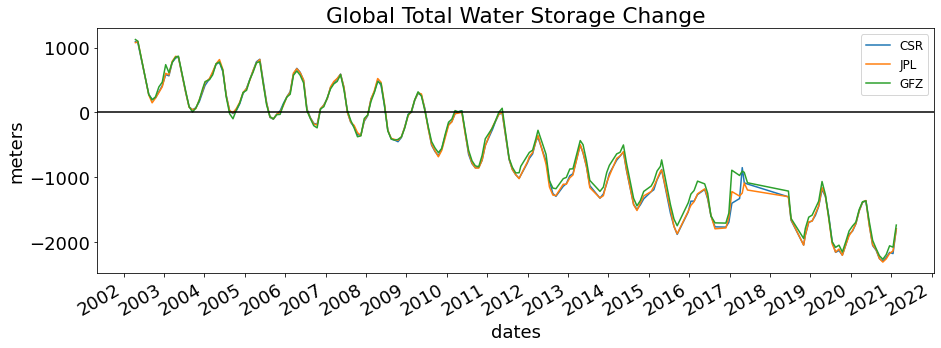

In [78]:
# compare solutions using global total water storage 

import matplotlib.dates as mdates
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import STL
import matplotlib.pyplot as plt 
import pandas as pd

# plot
fig, ax = plt.subplots(figsize=(15,5))

global_crs = csr.lwe_thickness.sum(dim=['lat','lon'], skipna=True) # global sum
plt.plot(global_crs.time, global_crs.values, label = 'CSR')

global_jpl = jpl.lwe_thickness.sum(dim=['lat','lon'], skipna=True) # global sum
plt.plot(global_jpl.time, global_jpl.values, label = 'JPL')

global_gfz = gfz.lwe_thickness.sum(dim=['lat','lon'], skipna=True) # global sum
plt.plot(global_gfz.time, global_gfz.values, label = 'GFZ')

# horizontal line in 0
plt.axhline(y=0, color = 'k')

# format dates x axis
ax.xaxis_date()
years =mdates.YearLocator(1)
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
# ax.set_xlim(pd.Timestamp("1950-01-01"),pd.Timestamp("2021-02-15"))
fig.autofmt_xdate()
plt.xlabel('dates')

# format y label
# plt.yticks(np.arange(-3, 4, 1)) 
plt.ylabel('meters')

# Title and axis
plt.title('Global Total Water Storage Change')

# legend 
plt.legend(prop={'size':12})

# save figure
plt.savefig('../figures/03_tws_global.png',bbox_inches = 'tight', dpi=600)

The graph above has a few interesting features:
- it seems that the global water storage change has a negative linear trend 
- it has a seasonal behaviour, maintaining a similar amplitude
- the centres' solutions are very similar

With this knowledge some decisions for the further steps were made:
- the final solution will be the mean of the 3 centres'
- the dataset it's gonna be fit into a sine using LMFIT, this will allow to fill the gap between the months without data in 2018-2019

### Extract TWS within the desired Basins

In [29]:
# Functions to extract raster value within a shapefile geometry
# solution adapeted from https://stackoverflow.com/questions/51398563/python-mask-netcdf-data-using-shapefile

from rasterio import features
from affine import Affine
import numpy as np


def transform_from_latlon(lat, lon):
    """ input 1D array of lat / lon and output an Affine transformation
    """
    lat = np.asarray(lat)
    lon = np.asarray(lon)
    trans = Affine.translation(lon[0], lat[0])
    scale = Affine.scale(lon[1] - lon[0], lat[1] - lat[0])
    return trans * scale

def rasterize(shapes, coords, lat='lat', lon='lon',
              fill=np.nan, **kwargs):
    """Rasterize a list of (geometry, fill_value) tuples onto the given
    xray coordinates. This only works for 1d latitude and longitude
    arrays.

    usage:
    -----
    1. read shapefile to geopandas.GeoDataFrame
          `states = gpd.read_file(shp_dir+shp_file)`
    2. encode the different shapefiles that capture those lat-lons as different
        numbers i.e. 0.0, 1.0 ... and otherwise np.nan
          `shapes = (zip(states.geometry, range(len(states))))`
    3. Assign this to a new coord in your original xarray.DataArray
          `ds['states'] = rasterize(shapes, ds.coords, longitude='X', latitude='Y')`

    arguments:
    ---------
    : **kwargs (dict): passed to `rasterio.rasterize` function

    attrs:
    -----
    :transform (affine.Affine): how to translate from latlon to ...?
    :raster (numpy.ndarray): use rasterio.features.rasterize fill the values
      outside the .shp file with np.nan
    :spatial_coords (dict): dictionary of {"X":xr.DataArray, "Y":xr.DataArray()}
      with "X", "Y" as keys, and xr.DataArray as values

    returns:
    -------
    :(xr.DataArray): DataArray with `values` of nan for points outside shapefile
      and coords `Y` = latitude, 'X' = longitude.


    """
    transform = transform_from_latlon(coords[lat], coords[lon])
    out_shape = (len(coords[lat]), len(coords[lon]))
    raster = features.rasterize(shapes, out_shape=out_shape,
                                fill=fill, transform=transform,
                                dtype=float, **kwargs)
    spatial_coords = {lat: coords[lat], lon: coords[lon]}
    return xr.DataArray(raster, coords=spatial_coords, dims=(lat, lon))

def add_shape_coord_from_data_array(xr_da, shp_gpd, coord_name):
    """ Create a new coord for the xr_da indicating whether or not it 
         is inside the shapefile

        Creates a new coord - "coord_name" which will have integer values
         used to subset xr_da for plotting / analysis/

        Usage:
        -----
        precip_da = add_shape_coord_from_data_array(precip_da, "awash.shp", "awash")
        awash_da = precip_da.where(precip_da.awash==0, other=np.nan) 
    """

    # 1. create a list of tuples (shapely.geometry, id)
    #    this allows for many different polygons within a .shp file (e.g. States of US)
    shapes = [(shape, n) for n, shape in enumerate(shp_gpd.geometry)]

    # 2. create a new coord in the xr_da which will be set to the id in `shapes`
    xr_da[coord_name] = rasterize(shapes, xr_da.coords, 
                               lon='lon', lat='lat')

    return xr_da

In [30]:
# extracting values 
# # whole SA
csr = add_shape_coord_from_data_array(csr, SA_basins, 'basins')
basins_dissolved_csr = csr.where(csr.basins>=0) # when crs.basins >0 is where the raster values where clipped for each basin

jpl = add_shape_coord_from_data_array(jpl, SA_basins, 'basins')
basins_dissolved_jpl = jpl.where(jpl.basins>=0) # when crs.basins >0 is where the raster values where clipped for each basin

# whole SA
gfz = add_shape_coord_from_data_array(gfz, SA_basins, 'basins')
basins_dissolved_gfz = gfz.where(gfz.basins>=0) # when crs.basins >0 is where the raster values where clipped for each basin

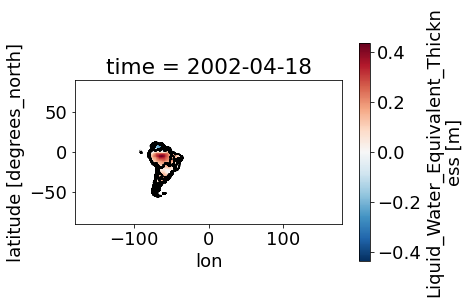

In [31]:
# plot
ax = SA_basins.boundary.plot(edgecolor="black")
basins_dissolved_csr.lwe_thickness[0].plot(ax=ax,zorder=-1)


In [32]:
# amazon basin
i = 0 

# extract sum from basin
## CSR
basins_dissolved_csr = csr.where(csr.basins==i)
basin_ts_csr = basins_dissolved_csr.lwe_thickness.sum(['lat', 'lon']).values

## JPL
basins_dissolved_jpl = jpl.where(jpl.basins==i)
basin_ts_jpl = basins_dissolved_jpl.lwe_thickness.sum(['lat', 'lon']).values

## GFZ
basins_dissolved_gfz = gfz.where(csr.basins==i)
basin_ts_gfz = basins_dissolved_gfz.lwe_thickness.sum(['lat', 'lon']).values

# save into a dataframe and perform a mean of the solutions
amazon = pd.DataFrame({
    'date': pd.to_datetime(csr.time.values).strftime('%Y-%m-%d'), 
    'csr' : basin_ts_csr,
    'jpl' : basin_ts_jpl,
    'gfz': basin_ts_gfz,
    'mean': np.mean([basin_ts_csr,basin_ts_jpl, basin_ts_gfz], axis = 0 )
})

In [33]:
# la plata basin
i = 1 

# extract sum from basin
## CSR
basins_dissolved_csr = csr.where(csr.basins==i)
basin_ts_csr = basins_dissolved_csr.lwe_thickness.sum(['lat', 'lon']).values

## JPL
basins_dissolved_jpl = jpl.where(jpl.basins==i)
basin_ts_jpl = basins_dissolved_jpl.lwe_thickness.sum(['lat', 'lon']).values

## GFZ
basins_dissolved_gfz = gfz.where(csr.basins==i)
basin_ts_gfz = basins_dissolved_gfz.lwe_thickness.sum(['lat', 'lon']).values

# save into a dataframe and perform a mean of the solutions
laplata = pd.DataFrame({
    'date': pd.to_datetime(csr.time.values).strftime('%Y-%m-%d'), 
    'csr' : basin_ts_csr,
    'jpl' : basin_ts_jpl,
    'gfz': basin_ts_gfz,
    'mean': np.mean([basin_ts_csr,basin_ts_jpl, basin_ts_gfz], axis = 0 )
})

### Fill empty months with zero

In [34]:
# amazon
amazon.date = pd.to_datetime(amazon.date)
amazon_model = amazon


newdatesindex = []
for i in iter(range(0,len(amazon_model.date))):
    newdatesindex.append(amazon_model.date[i].to_period('M')) # remove day of the month

# resample into monthly mean
amazon_model.index = newdatesindex
amazon_model.index = amazon_model.index.to_timestamp()
amazon_model = amazon_model.resample('M').mean()
amazon_model['date'] = amazon_model.index
amazon_model = amazon_model.reset_index()

# replace nan with zeros
amazon_model['mean'] = amazon_model['mean'].fillna(0)
amazon_model.date = pd.to_datetime(amazon_model.date)

# show df
amazon_model

,index,csr,jpl,gfz,mean,date
0,2002-04-30,84.369257,80.924856,80.802957,82.032357,2002-04-30
1,2002-05-31,86.965760,83.802493,81.803649,84.190634,2002-05-31
2,2002-06-30,NaN,NaN,NaN,0.000000,2002-06-30
3,2002-07-31,NaN,NaN,NaN,0.000000,2002-07-31
4,2002-08-31,-15.668626,-20.241679,-16.107215,-17.339174,2002-08-31
...,...,...,...,...,...,...
222,2020-10-31,-111.266000,-110.649812,-107.815862,-109.910558,2020-10-31
223,2020-11-30,-104.686048,-101.829308,-96.368099,-100.961151,2020-11-30
224,2020-12-31,-60.592933,-56.688407,-52.254137,-56.511825,2020-12-31
225,2021-01-31,3.093164,2.729393,1.607364,2.476640,2021-01-31


In [35]:
# laplata
laplata.date = pd.to_datetime(laplata.date)
laplata_model = laplata


newdatesindex = []
for i in iter(range(0,len(laplata_model.date))):
    newdatesindex.append(laplata_model.date[i].to_period('M')) # remove day of the month

# resample into monthly mean
laplata_model.index = newdatesindex
laplata_model.index = laplata_model.index.to_timestamp()
laplata_model = laplata_model.resample('M').mean()
laplata_model['date'] = laplata_model.index
laplata_model = laplata_model.reset_index()

# replace nan with zeros
laplata_model['mean'] = laplata_model['mean'].fillna(0)
laplata_model.date = pd.to_datetime(laplata_model.date)

# show df
laplata_model

,index,csr,jpl,gfz,mean,date
0,2002-04-30,26.870704,24.808923,20.913647,24.197758,2002-04-30
1,2002-05-31,19.381996,18.449582,16.975263,18.268947,2002-05-31
2,2002-06-30,NaN,NaN,NaN,0.000000,2002-06-30
3,2002-07-31,NaN,NaN,NaN,0.000000,2002-07-31
4,2002-08-31,11.024493,8.122543,9.545579,9.564205,2002-08-31
...,...,...,...,...,...,...
222,2020-10-31,-31.454564,-29.499144,-25.950905,-28.968204,2020-10-31
223,2020-11-30,-30.097411,-28.994530,-21.942932,-27.011624,2020-11-30
224,2020-12-31,-21.769234,-19.693654,-16.575358,-19.346082,2020-12-31
225,2021-01-31,-11.921600,-13.263230,-12.468617,-12.551149,2021-01-31


### Fit observations into a sine model

[[Model]]
    Model(mysine)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 600
    # data points      = 227
    # variables        = 3
    chi-square         = 289594.890
    reduced chi-square = 1292.83433
    Akaike info crit   = 1629.34244
    Bayesian info crit = 1639.61729
[[Variables]]
    amp:    100.000000 +/- 2.89615244 (2.90%) (init = 126.9719)
    freq:   0.52302340 +/- 5.1410e-04 (0.10%) (init = 0.5)
    shift: -4.78681488 +/- 0.06751935 (1.41%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(freq, shift) = -0.866


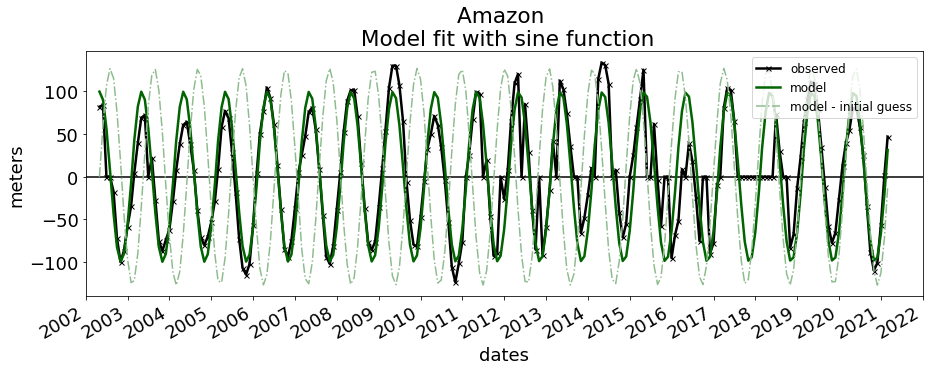

In [36]:
# amazon
# fit model

from scipy.signal import find_peaks
from lmfit.model import Model, save_model

# find amplitude
positive_peaks_idx = find_peaks(amazon_model['mean'])[0]
neagtive_peaks_idx = find_peaks(-amazon_model['mean'])[0]

amplitudes =[]
for i in iter(range(0,len(positive_peaks_idx))):
    amplitudes.append(amazon_model['mean'][positive_peaks_idx[i]] - amazon_model['mean'][neagtive_peaks_idx[i]])

# fit sine
def mysine(x, amp, freq, shift):
    return amp * np.sin(x*freq + shift)

x = amazon_model.index
y = amazon_model['mean']

model = Model(mysine)
params = model.make_params(amp=np.mean(amplitudes), freq=1/2, shift=0)
params['shift'].max = 10
params['shift'].min = -10
params['amp'].min = 100
params['amp'].max = 150
params['freq'].min = 1/10
params['freq'].max = 2


result = model.fit(y, params, x=x)
yy = result.best_fit
print(result.fit_report())

yyy = result.init_fit
fig, ax = plt.subplots(figsize=(15,5))

plt.axhline(y=0, color = 'k')

plt.plot(amazon_model['date'], y, color = 'k', ls = '-', marker = 'x', lw = 2.5, markersize = 5, label='observed')
plt.plot(amazon_model['date'], yy, 'darkgreen', ls = '-', lw = 2.5, label='model')
plt.plot(amazon_model['date'], yyy, 'darkseagreen', ls = '-.', lw = 1.5, label='model - initial guess')

plt.title('Amazon \n Model fit with sine function')
# format dates x axis
ax.xaxis_date()
years =mdates.YearLocator(1)
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
ax.set_xlim(pd.Timestamp("2002-01-01"),pd.Timestamp("2022-01-01"))
fig.autofmt_xdate()
plt.xlabel('dates')
plt.ylabel('meters')

plt.legend(prop={'size':12})

plt.savefig('../figures/04_amazon_model.png',bbox_inches = 'tight', dpi=600)

The observation was fit into a sine model (y = amp * np.sin(x*freq + shift)).
The estimated amplitude is 126.9719 and the model one is 100.
The estimated frequency is 0.5 and the model one is 0.52302340.
The modelled shift is -4.78681488.

In the graph is noticeable that the first guess of the parameters are a bit off. The amplitude is a bit too much, especially for the lowest values, and the shift adjustment made the model stay in sync with the observed data.
Tre frequency was a good guess.

The correlation is -0.866, which is good.


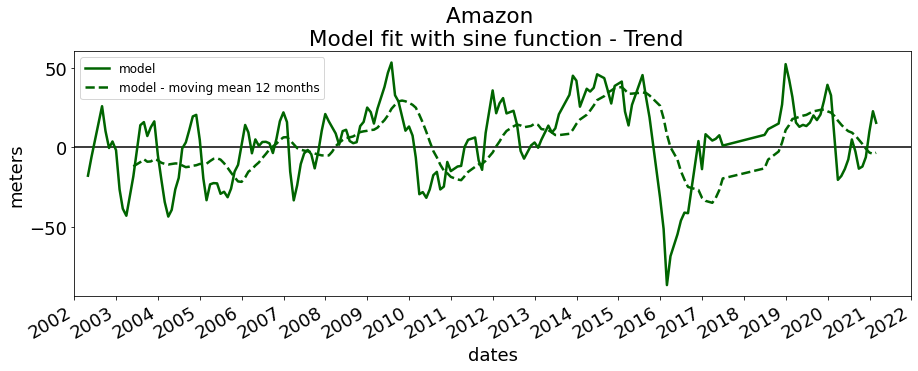

In [53]:
# amazon
# plot trend
amazon_model['model'] = yy

fig, ax = plt.subplots(figsize=(15,5))

plt.axhline(y=0, color = 'k')

amazon_model_diff = amazon_model[~(amazon_model['mean']==0)]
plt.plot(amazon_model_diff['date'], amazon_model_diff['mean'] - amazon_model_diff['model'], 
         color = "darkgreen", lw=2.5, label = 'model')
plt.plot(amazon_model_diff['date'],
        (amazon_model_diff['mean'] - amazon_model_diff['model']).rolling(window=12).mean(),
        color = 'darkgreen', ls = '--', lw = 2.5, label = 'model - moving mean 12 months'
        )


plt.title('Amazon \n Model fit with sine function - Trend')
# format dates x axis
ax.xaxis_date()
years =mdates.YearLocator(1)
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
ax.set_xlim(pd.Timestamp("2002-01-01"),pd.Timestamp("2022-01-01"))
fig.autofmt_xdate()
plt.xlabel('dates')
plt.ylabel('meters')

plt.legend(prop={'size':12})
plt.savefig('../figures/05_amazon_trend.png',bbox_inches = 'tight', dpi=600)

To find the yearly trend a moving average of 13 months was performed, this is later gonna be compared with ONI.

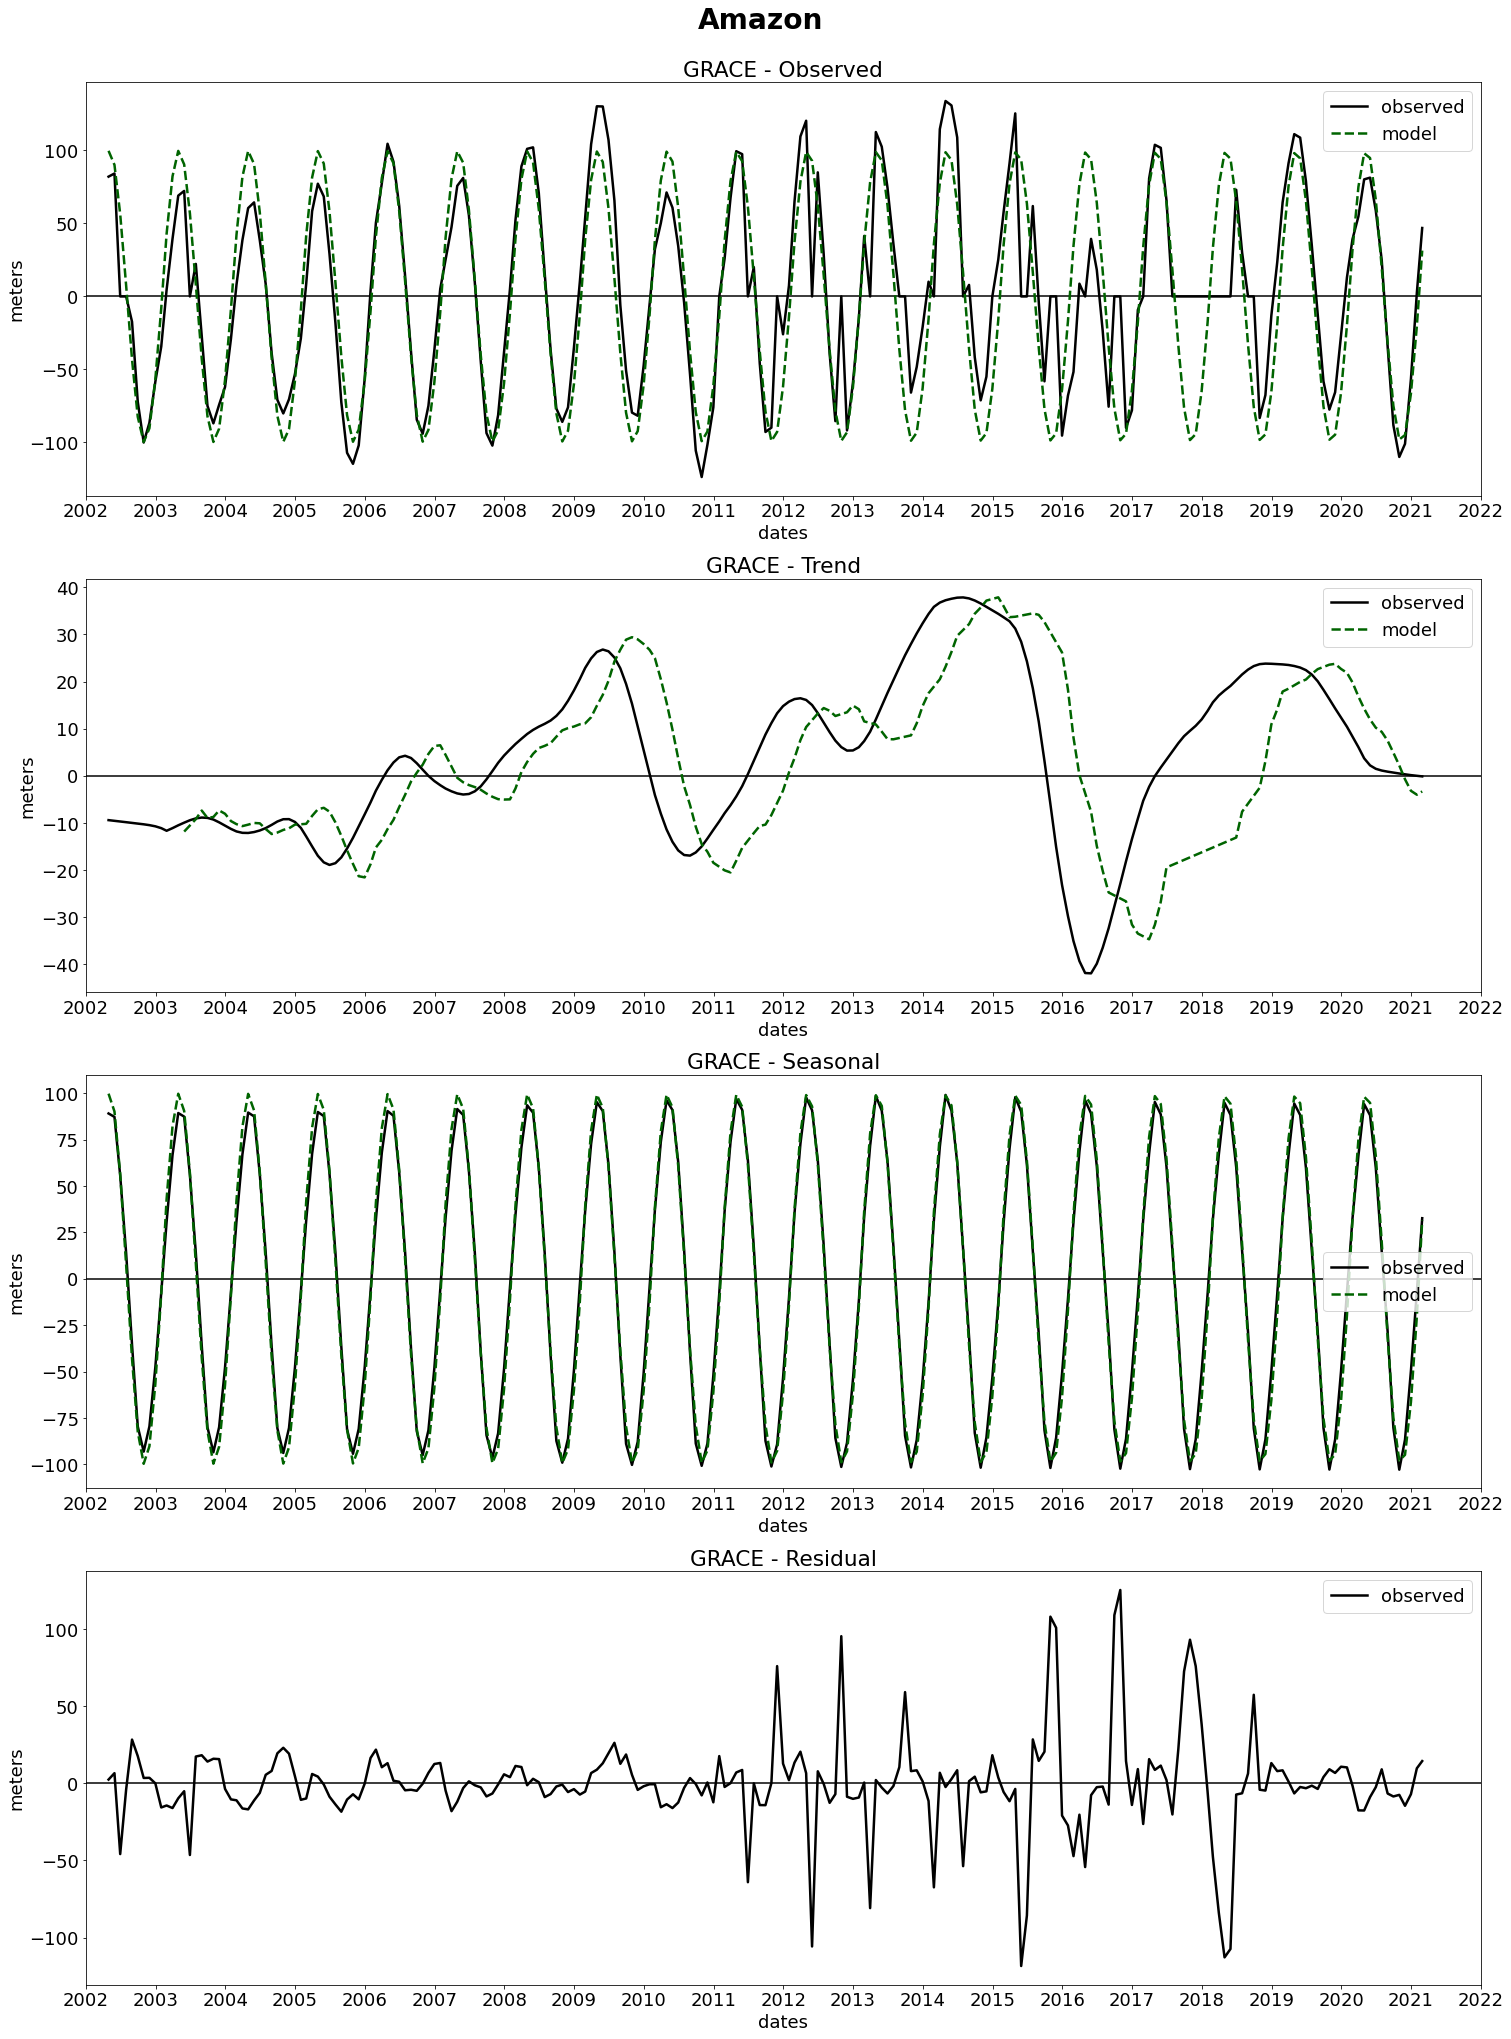

In [76]:
# amazon
# plot decompose

amazon_decompose = STL(amazon_model['mean'], period=12, seasonal=13, seasonal_deg=0, trend_deg=0, low_pass_deg=0, robust=True)

amazon_decompose = amazon_decompose.fit()




plt.figure(figsize=(25,35))

ax = plt.subplot(4,1,1)
plt.axhline(y=0, color = 'k')
plt.plot(pd.to_datetime(amazon_model.date), amazon_decompose.observed, color = 'k', lw = 2.5, label = 'observed')
plt.plot(pd.to_datetime(amazon_model.date), amazon_model.model, color = 'darkgreen', lw = 2.5, ls='--', label = 'model')

plt.title('GRACE - Observed')
# format dates x axis
ax.xaxis_date()
years =mdates.YearLocator(1)
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
ax.set_xlim(pd.Timestamp("2002-01-01"),pd.Timestamp("2022-01-01"))
fig.autofmt_xdate()
plt.xlabel('dates')
plt.ylabel('meters')
plt.legend()

ax = plt.subplot(4,1,2)
plt.axhline(y=0, color = 'k')
plt.plot(pd.to_datetime(amazon_model.date), amazon_decompose.trend, color = 'k', lw = 2.5, label = "observed")
plt.plot(pd.to_datetime(amazon_model_diff['date']),
         (amazon_model_diff['mean'] - amazon_model_diff['model']).rolling(window=12).mean(), 
                        color = 'darkgreen', lw = 2.5, ls='--', label = 'model')

plt.title('GRACE - Trend')
# format dates x axis
ax.xaxis_date()
years =mdates.YearLocator(1)
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
ax.set_xlim(pd.Timestamp("2002-01-01"),pd.Timestamp("2022-01-01"))
fig.autofmt_xdate()
plt.xlabel('dates')
plt.ylabel('meters')
plt.legend()


ax = plt.subplot(4,1,3)
plt.axhline(y=0, color = 'k')
plt.plot(pd.to_datetime(amazon_model.date), amazon_decompose.seasonal, color = 'k', lw = 2.5, label = 'observed')

def mysine(x, amp, freq, shift):
    return amp * np.sin(x*freq + shift)

yyy = mysine(x, amp=100, freq = 0.52302361, shift = -4.78683771)

plt.plot(pd.to_datetime(amazon_model.date), yyy , color = 'darkgreen', lw = 2.5, ls='--', label = 'model')

plt.title('GRACE - Seasonal')
# format dates x axis
ax.xaxis_date()
years =mdates.YearLocator(1)
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
ax.set_xlim(pd.Timestamp("2002-01-01"),pd.Timestamp("2022-01-01"))
fig.autofmt_xdate()
plt.xlabel('dates')
plt.ylabel('meters')
plt.legend()

ax = plt.subplot(4,1,4)
plt.axhline(y=0, color = 'k')
plt.plot(pd.to_datetime(amazon_model.date), amazon_decompose.resid, color = 'k', lw = 2.5, label = 'observed')

plt.title('GRACE - Residual')
# format dates x axis
ax.xaxis_date()
years =mdates.YearLocator(1)
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
ax.set_xlim(pd.Timestamp("2002-01-01"),pd.Timestamp("2022-01-01"))
fig.autofmt_xdate()
plt.xlabel('dates')
plt.ylabel('meters')
plt.legend()

plt.suptitle('Amazon',weight = 'bold', fontsize = 28, y=0.91)

plt.savefig('../figures/06_amazon_decompose.png',bbox_inches = 'tight', dpi=600)

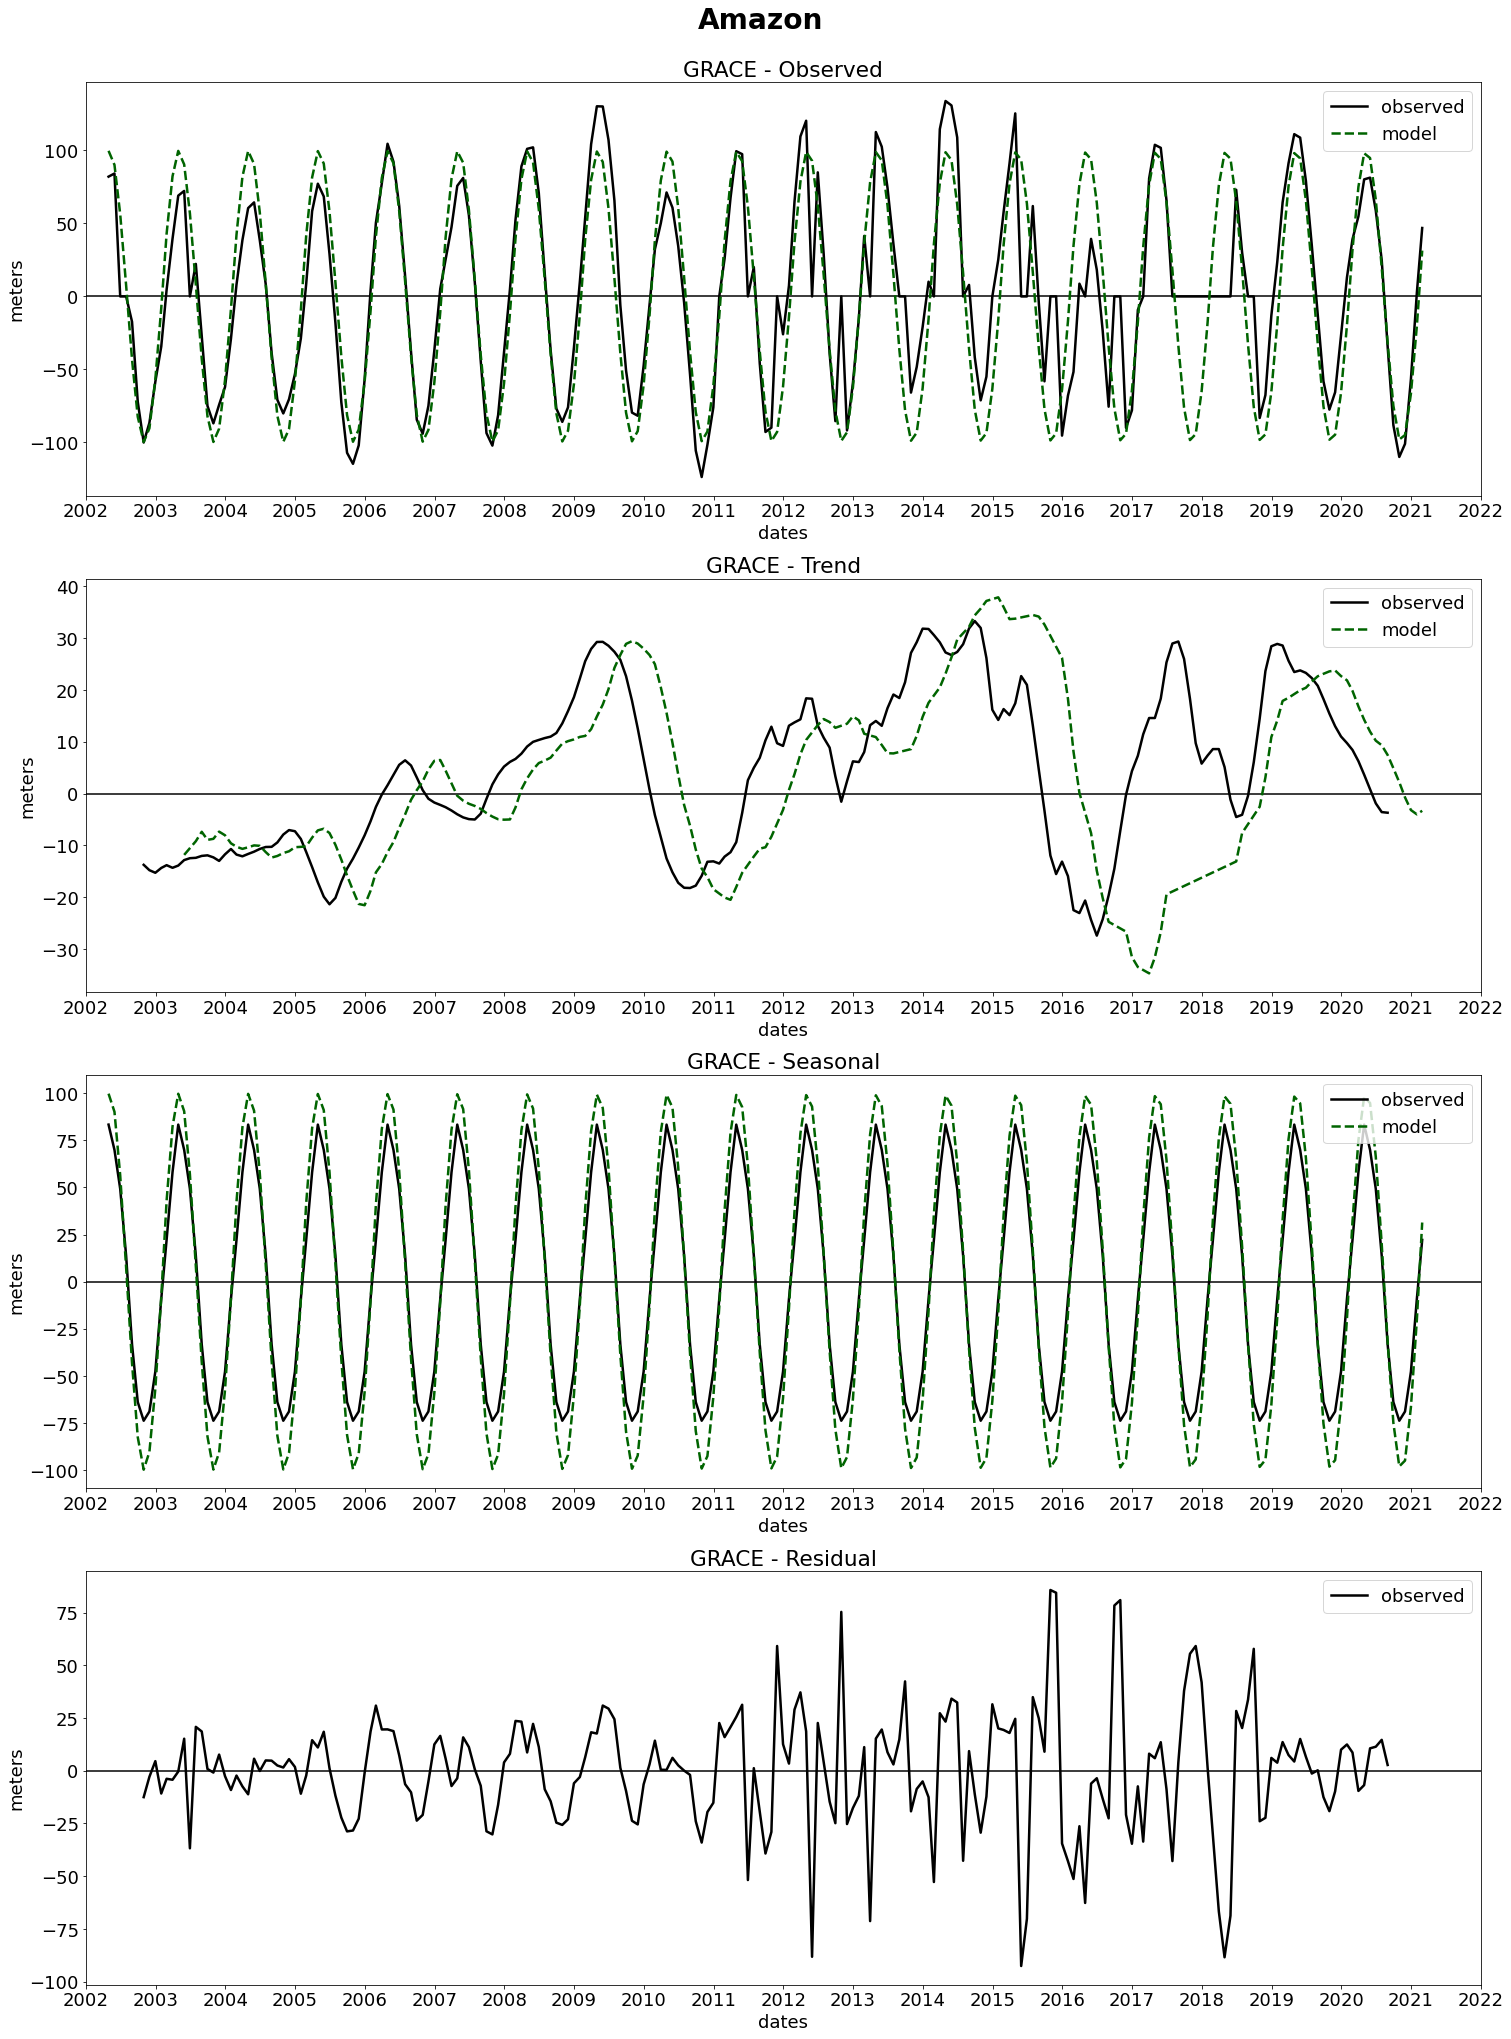

In [55]:
# amazon
# plot decompose
amazon_decompose = seasonal_decompose(amazon_model['mean'], model='additive', period=12) # additive because the aplitude is the same

plt.figure(figsize=(25,35))

ax = plt.subplot(4,1,1)
plt.axhline(y=0, color = 'k')
plt.plot(pd.to_datetime(amazon_model.date), amazon_decompose.observed, color = 'k', lw = 2.5, label = 'observed')
plt.plot(pd.to_datetime(amazon_model.date), amazon_model.model, color = 'darkgreen', lw = 2.5, ls='--', label = 'model')

plt.title('GRACE - Observed')
# format dates x axis
ax.xaxis_date()
years =mdates.YearLocator(1)
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
ax.set_xlim(pd.Timestamp("2002-01-01"),pd.Timestamp("2022-01-01"))
fig.autofmt_xdate()
plt.xlabel('dates')
plt.ylabel('meters')
plt.legend()

ax = plt.subplot(4,1,2)
plt.axhline(y=0, color = 'k')
plt.plot(pd.to_datetime(amazon_model.date), amazon_decompose.trend, color = 'k', lw = 2.5, label = "observed")
plt.plot(pd.to_datetime(amazon_model_diff['date']),
         (amazon_model_diff['mean'] - amazon_model_diff['model']).rolling(window=12).mean(), 
                        color = 'darkgreen', lw = 2.5, ls='--', label = 'model')

plt.title('GRACE - Trend')
# format dates x axis
ax.xaxis_date()
years =mdates.YearLocator(1)
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
ax.set_xlim(pd.Timestamp("2002-01-01"),pd.Timestamp("2022-01-01"))
fig.autofmt_xdate()
plt.xlabel('dates')
plt.ylabel('meters')
plt.legend()


ax = plt.subplot(4,1,3)
plt.axhline(y=0, color = 'k')
plt.plot(pd.to_datetime(amazon_model.date), amazon_decompose.seasonal, color = 'k', lw = 2.5, label = 'observed')

def mysine(x, amp, freq, shift):
    return amp * np.sin(x*freq + shift)

yyy = mysine(x, amp=100, freq = 0.52302361, shift = -4.78683771)

plt.plot(pd.to_datetime(amazon_model.date), yyy , color = 'darkgreen', lw = 2.5, ls='--', label = 'model')

plt.title('GRACE - Seasonal')
# format dates x axis
ax.xaxis_date()
years =mdates.YearLocator(1)
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
ax.set_xlim(pd.Timestamp("2002-01-01"),pd.Timestamp("2022-01-01"))
fig.autofmt_xdate()
plt.xlabel('dates')
plt.ylabel('meters')
plt.legend()

ax = plt.subplot(4,1,4)
plt.axhline(y=0, color = 'k')
plt.plot(pd.to_datetime(amazon_model.date), amazon_decompose.resid, color = 'k', lw = 2.5, label = 'observed')

plt.title('GRACE - Residual')
# format dates x axis
ax.xaxis_date()
years =mdates.YearLocator(1)
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
ax.set_xlim(pd.Timestamp("2002-01-01"),pd.Timestamp("2022-01-01"))
fig.autofmt_xdate()
plt.xlabel('dates')
plt.ylabel('meters')
plt.legend()

plt.suptitle('Amazon',weight = 'bold', fontsize = 28, y=0.91)

plt.savefig('../figures/06_amazon_decompose.png',bbox_inches = 'tight', dpi=600)

In [ ]:
# def mysine(x, amp, freq, shift):
#     return amp * np.sin(x*freq + shift)

# yyy = mysine(x, amp=100, freq = 0.52302361, shift = -4.78683771)

# plt.plot(pd.to_datetime(amazon_model.date), yyy , color = 'darkgreen', lw = 2.5, ls='--', label = 'model')

A comparison between the model and statsmodels seasonal_decompose showed very similar results.
The trend was very similar, the only difference is where there are no observations. because of the model interpolating data, there is showing a consistent positive trend between 2018-2019, while the observed one had zeros there, so it drops down to below zero there.
The model has the same frequency of the seasonal signal detected, the main difference is in the amplitude, observed one is a bit smaller and it's not centred in zero, having more values above zero than below.
Overall the model seems to be good for forecast and filling gaps in the dataset.


[[Model]]
    Model(mysine)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 120
    # data points      = 227
    # variables        = 3
    chi-square         = 27621.8618
    reduced chi-square = 123.311883
    Akaike info crit   = 1095.92071
    Bayesian info crit = 1106.19556
[[Variables]]
    amp:    10.1948679 +/- 1.04484347 (10.25%) (init = 15.3345)
    freq:   0.52116621 +/- 0.00154945 (0.30%) (init = 0.5)
    shift: -4.37373384 +/- 0.20314871 (4.64%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(freq, shift) = -0.865


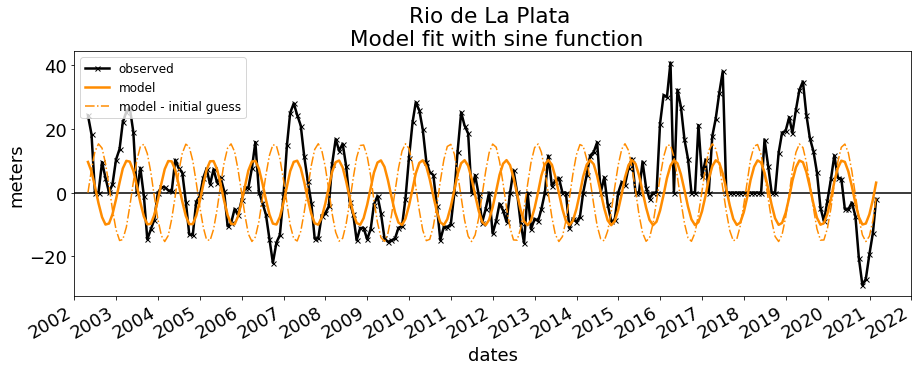

In [56]:
# la plata
# fit model

from scipy.signal import find_peaks
from lmfit.model import Model, save_model

# find amplitude
positive_peaks_idx = find_peaks(laplata_model['mean'])[0]
neagtive_peaks_idx = find_peaks(-laplata_model['mean'])[0]

amplitudes =[]
for i in iter(range(0,len(positive_peaks_idx))):
    amplitudes.append(laplata_model['mean'][positive_peaks_idx[i]] - laplata_model['mean'][neagtive_peaks_idx[i]])

# fit sine
def mysine(x, amp, freq, shift):
    return amp * np.sin(x*freq + shift)

x = laplata_model.index
y = laplata_model['mean']

model = Model(mysine)
params = model.make_params(amp=np.mean(amplitudes), freq=1/2, shift=0)
params['shift'].max = 10
params['shift'].min = -10
params['amp'].min = 10
params['amp'].max = 50
params['freq'].min = 1/10
params['freq'].max = 2


result = model.fit(y, params, x=x)
yy = result.best_fit
print(result.fit_report())

yyy = result.init_fit
fig, ax = plt.subplots(figsize=(15,5))

plt.axhline(y=0, color = 'k')

plt.plot(laplata_model['date'], y, color = 'k', ls = '-', marker = 'x', lw = 2.5, markersize = 5, label='observed')
plt.plot(laplata_model['date'], yy, 'darkorange', ls = '-', lw = 2.5, label='model')
plt.plot(laplata_model['date'], yyy, 'darkorange', ls = '-.', lw = 1.5, label='model - initial guess')

plt.title('Rio de La Plata \n Model fit with sine function')
# format dates x axis
ax.xaxis_date()
years =mdates.YearLocator(1)
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
ax.set_xlim(pd.Timestamp("2002-01-01"),pd.Timestamp("2022-01-01"))
fig.autofmt_xdate()
plt.xlabel('dates')
plt.ylabel('meters')

plt.legend(prop={'size':12})

plt.savefig('../figures/07_laplata_model.png',bbox_inches = 'tight', dpi=600)

The observation was fit into a sine model (y = amp * np.sin(x*freq + shift)).
The estimated amplitude is 15.3345 and the model one is 10.1948679.
The estimated frequency is 0.5 and the model one is 0.52116621.
The modelled shift is -4.37373384.

In the graph is noticeable that the first guess of the parameters are a bit off. The amplitude is a bit too much,, and the shift adjustment made the model stay in sync with the observed data.
Tre frequency was a good guess.

The correlation is -0.865, which is good.

Im comparison to the Amazon, La Plata is not so regular. During 2016-2020 no negative values of TWS were observed. 


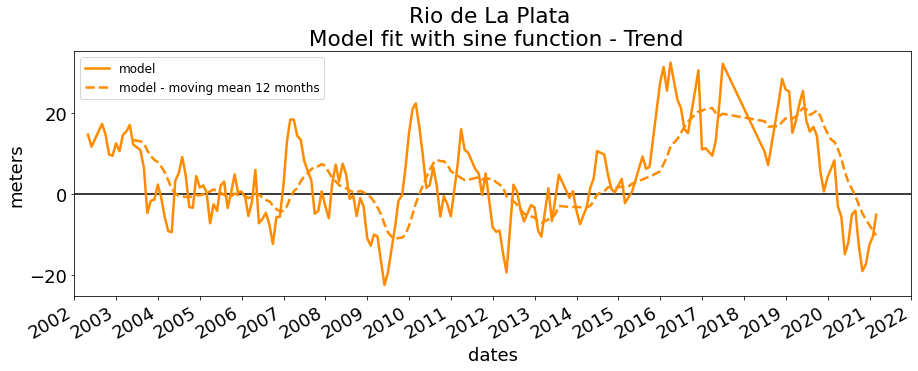

In [57]:
# la plata
# plot trend
laplata_model['model'] = yy

fig, ax = plt.subplots(figsize=(15,5))

plt.axhline(y=0, color = 'k')

laplata_model_diff = laplata_model[~(laplata_model['mean']==0)]
plt.plot(laplata_model_diff['date'], laplata_model_diff['mean'] - laplata_model_diff['model'], 
         color = "darkorange", lw=2.5, label = 'model')
plt.plot(laplata_model_diff['date'],
         (laplata_model_diff['mean'] - laplata_model_diff['model']).rolling(window=12).mean(),
        color = 'darkorange', ls = '--', lw = 2.5, label = 'model - moving mean 12 months'
        )

plt.title('Rio de La Plata \n Model fit with sine function - Trend')
# format dates x axis
ax.xaxis_date()
years =mdates.YearLocator(1)
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
ax.set_xlim(pd.Timestamp("2002-01-01"),pd.Timestamp("2022-01-01"))
fig.autofmt_xdate()
plt.xlabel('dates')
plt.ylabel('meters')

plt.legend(prop={'size':12})
plt.savefig('../figures/08_laplata_trend.png',bbox_inches = 'tight', dpi=600)

To find the yearly trend a moving average of 13 months was performed, this is later gonna be compared with ONI.

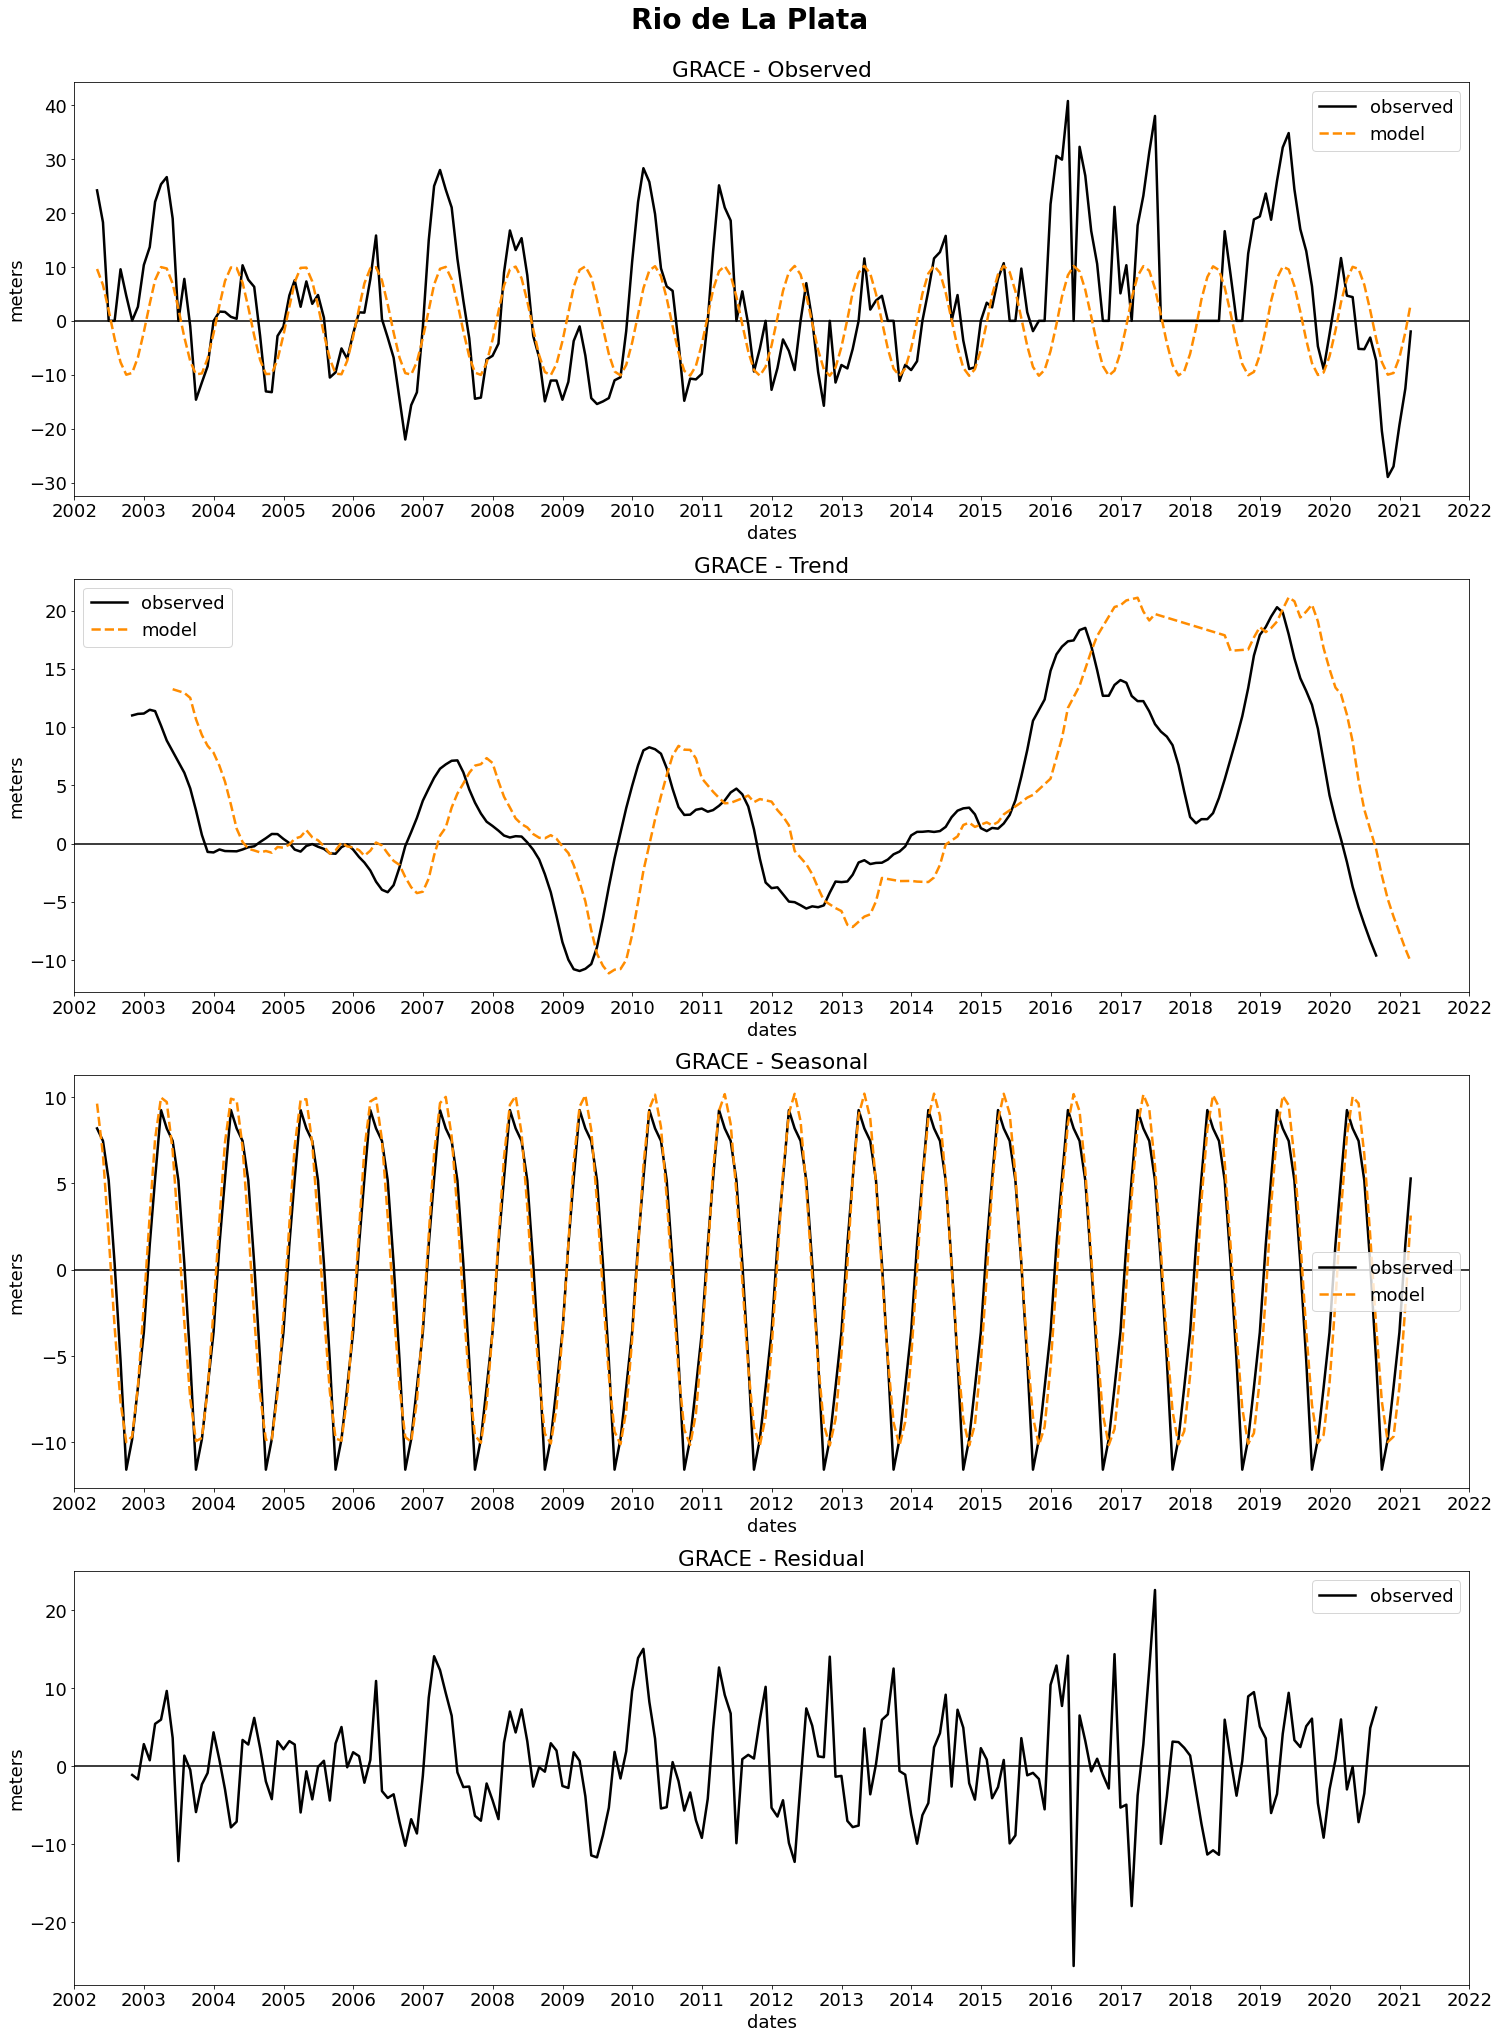

In [58]:
# la plata
# plot decompose
laplata_decompose = seasonal_decompose(laplata_model['mean'], model='additive', period=12) # additive because the aplitude is the same

plt.figure(figsize=(25,35))

ax = plt.subplot(4,1,1)
plt.axhline(y=0, color = 'k')
plt.plot(pd.to_datetime(laplata_model.date), laplata_decompose.observed, color = 'k', lw = 2.5, label = 'observed')
plt.plot(pd.to_datetime(laplata_model.date), laplata_model.model, color = 'darkorange', lw = 2.5, ls='--', label = 'model')

plt.title('GRACE - Observed')
# format dates x axis
ax.xaxis_date()
years =mdates.YearLocator(1)
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
ax.set_xlim(pd.Timestamp("2002-01-01"),pd.Timestamp("2022-01-01"))
fig.autofmt_xdate()
plt.xlabel('dates')
plt.ylabel('meters')
plt.legend()

ax = plt.subplot(4,1,2)
plt.axhline(y=0, color = 'k')
plt.plot(pd.to_datetime(laplata_model.date), laplata_decompose.trend, color = 'k', lw = 2.5, label = "observed")
plt.plot(pd.to_datetime(laplata_model_diff['date']),
         (laplata_model_diff['mean'] - laplata_model_diff['model']).rolling(window=12).mean(), 
                        color = 'darkorange', lw = 2.5, ls='--', label = 'model')

plt.title('GRACE - Trend')
# format dates x axis
ax.xaxis_date()
years =mdates.YearLocator(1)
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
ax.set_xlim(pd.Timestamp("2002-01-01"),pd.Timestamp("2022-01-01"))
fig.autofmt_xdate()
plt.xlabel('dates')
plt.ylabel('meters')
plt.legend()


ax = plt.subplot(4,1,3)
plt.axhline(y=0, color = 'k')
plt.plot(pd.to_datetime(laplata_model.date), laplata_decompose.seasonal, color = 'k', lw = 2.5, label = 'observed')

def mysine(x, amp, freq, shift):
    return amp * np.sin(x*freq + shift)

yyy = mysine(x, amp=10.1948679, freq = 0.52116621, shift = -4.37373384)

plt.plot(pd.to_datetime(laplata_model.date), yyy , color = 'darkorange', lw = 2.5, ls='--', label = 'model')

plt.title('GRACE - Seasonal')
# format dates x axis
ax.xaxis_date()
years =mdates.YearLocator(1)
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
ax.set_xlim(pd.Timestamp("2002-01-01"),pd.Timestamp("2022-01-01"))
fig.autofmt_xdate()
plt.xlabel('dates')
plt.ylabel('meters')
plt.legend()

ax = plt.subplot(4,1,4)
plt.axhline(y=0, color = 'k')
plt.plot(pd.to_datetime(laplata_model.date), laplata_decompose.resid, color = 'k', lw = 2.5, label = 'observed')

plt.title('GRACE - Residual')
# format dates x axis
ax.xaxis_date()
years =mdates.YearLocator(1)
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
ax.set_xlim(pd.Timestamp("2002-01-01"),pd.Timestamp("2022-01-01"))
fig.autofmt_xdate()
plt.xlabel('dates')
plt.ylabel('meters')
plt.legend()

plt.suptitle('Rio de La Plata',weight = 'bold', fontsize = 28, y=0.91)

plt.savefig('../figures/09_laplata_decompose.png',bbox_inches = 'tight', dpi=600)

A comparison between the model and statsmodels seasonal_decompose showed very similar results.
The trend was very similar, the only difference is where there are no observations. because of the model interpolating data, there is showing a consistent positive trend between 2018-2019, while the observed one had zeros there, so it drops down to near zero there.
The model has the same frequency of the seasonal signal detected, and the amplitude is quite spot-on as well, the only difference is that the observation is centred a few meters above zero.
Overall the model seems to be good for forecast and filling gaps in the dataset.


### Compare both observation and model against ONI

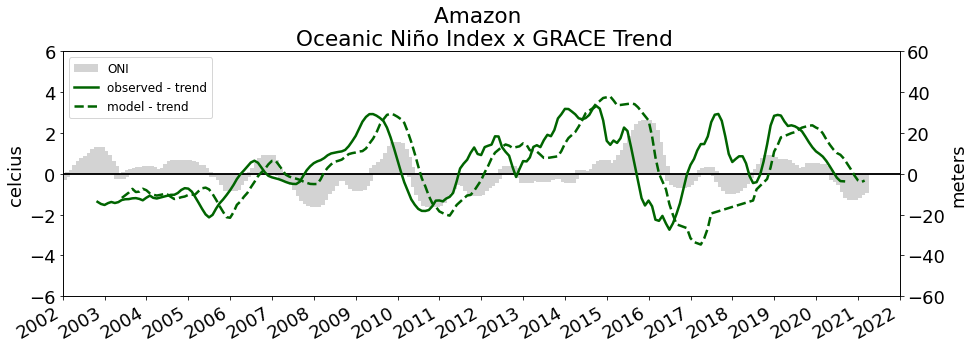

In [59]:
# plot ONI
fig, ax1 = plt.subplots(figsize=(15,5))
ax2 = ax1.twinx()

ax1.axhline(y=0, color = 'k')

ax2.axhline(y=0, color = 'k')


# plot ONI
ax1.bar(oni.index, oni.ANOM, width=100, color = 'lightgray', label = 'ONI')

ax2.plot(pd.to_datetime(amazon_model.date), amazon_decompose.trend, color = 'darkgreen', lw = 2.5, label ='observed - trend')
ax2.plot(amazon_model_diff['date'],
         (amazon_model_diff['mean'] - amazon_model_diff['model']).rolling(window=12).mean(),
         color = 'darkgreen', ls = '--', lw = 2.5, label ='model - trend'
        )

# format dates x axis
ax1.xaxis_date()
years =mdates.YearLocator(1)
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
ax1.set_xlim(pd.Timestamp("2002-01-01"),pd.Timestamp("2022-01-01"))
fig.autofmt_xdate()
plt.xlabel('dates')


# format y label
ax1.set_ylim(-6,6) 
ax1.set_ylabel('celcius')

ax2.set_ylim(-60,60)
ax2.set_ylabel('meters')

# Title and axis
plt.title('Amazon \n Oceanic Niño Index x GRACE Trend')


handles,labels = [],[]
for ax in fig.axes:
    for h,l in zip(*ax.get_legend_handles_labels()):
        handles.append(h)
        labels.append(l)

plt.legend(handles,labels, prop={'size':12})


# save figure
plt.savefig('../figures/10_amazon_oni.png',bbox_inches = 'tight', dpi=600)

From 2003 to 2009, and middle of 2007 to middle of 2010, the trend has a inverse signal compared to ONI. This makes sense, because teh expected relation between El Niño (La Niña) is dry (wet) conditions, so negative (positive) values. In the rest of the plot this inversion also occurus, but in similar scales.
In 2011 and 2012 all signals were negative. 

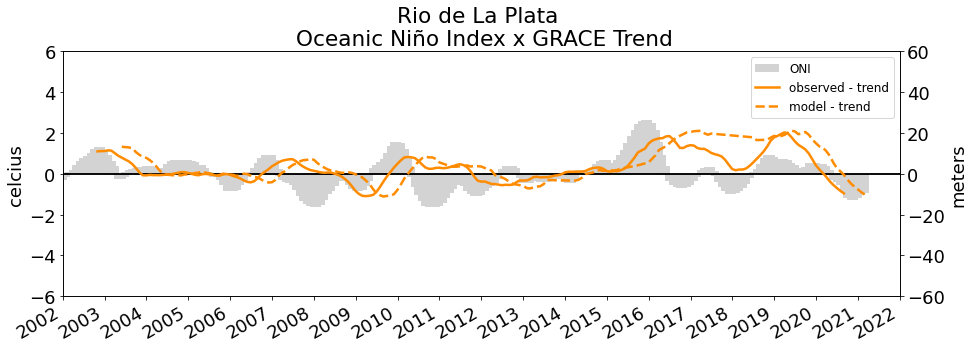

In [62]:
# plot ONI
fig, ax1 = plt.subplots(figsize=(15,5))
ax2 = ax1.twinx()

ax1.axhline(y=0, color = 'k')

ax2.axhline(y=0, color = 'k')


# plot ONI
ax1.bar(oni.index, oni.ANOM, width=100, color = 'lightgray', label = 'ONI')

ax2.plot(pd.to_datetime(laplata_model.date), laplata_decompose.trend, color = 'darkorange', lw = 2.5, label ='observed - trend')
ax2.plot(laplata_model_diff['date'],
         (laplata_model_diff['mean'] - laplata_model_diff['model']).rolling(window=12).mean(),
         color = 'darkorange', ls = '--', lw = 2.5, label ='model - trend'
        )

# format dates x axis
ax1.xaxis_date()
years =mdates.YearLocator(1)
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
ax1.set_xlim(pd.Timestamp("2002-01-01"),pd.Timestamp("2022-01-01"))
fig.autofmt_xdate()
plt.xlabel('dates')


# format y label
ax1.set_ylim(-6,6) 
ax1.set_ylabel('celcius')

ax2.set_ylim(-60,60)
ax2.set_ylabel('meters')

# Title and axis
plt.title('Rio de La Plata \n Oceanic Niño Index x GRACE Trend')


handles,labels = [],[]
for ax in fig.axes:
    for h,l in zip(*ax.get_legend_handles_labels()):
        handles.append(h)
        labels.append(l)

plt.legend(handles,labels, prop={'size':12})


# save figure
plt.savefig('../figures/11_laplata_oni.png',bbox_inches = 'tight', dpi=600)

On this basin, the signal seems to be a little shifter to the right of ONI, but on the same phase, this makes sense because El Niño (La Niña) conditions in this basin are wet (dry), so positive (negative) values. This shift seems to be of approximately 6 months

### Conclusions

GRACE shows the existence of a wet and dry season, one cycle takes approximately 1 year to complete. The dry season is during the winter months and the wet one during summer.

It was possible to fit GRACE into a sine model and represent very well the seasonal signal and the trend.

Although both basins had the seasonal signal in sync, the trend was not.
And the trend had an inverse signal for the Amazon basin and the Rio de La Plata basin direct relationship with a shift in approximately 6 months. 
In conclusion, the Amazon basin shows a rapid response to ENSO, while the Rio de La Plata takes a few months, this can be caused by the many climatic factors in play with ENSO dynamics.

### References

Dahlman, L. (2016). Climate Variability: Oceanic Niño Index.
https://www.climate.gov/news-features/understanding-climate/climate-variability-oceanic-ni%C3%B1o-index

Muñoz, Á. G., Thomson, M. C., Goddard, L. M., & Aldighieri, S. (2016). The Latin American and Caribbean climate landscape for ZIKV transmission.
https://www.researchgate.net/publication/303471112_The_Latin_American_and_Caribbean_Climate_Landscape_for_ZIKV_Transmission

Cai, W., McPhaden, M. J., Grimm, A. M., Rodrigues, R. R., Taschetto, A. S., Garreaud, R. D., ... & Vera, C. (2020). Climate impacts of the El Niño–Southern Oscillation on South America. Nature Reviews Earth & Environment, 1(4), 215-231.
https://par.nsf.gov/servlets/purl/10187393

Chiodi, A. M., & Harrison, D. E. (2015). Global seasonal precipitation anomalies robustly associated with El Niño and La Niña events—An OLR perspective. Journal of Climate, 28(15), 6133-6159.
https://www.researchgate.net/publication/277901561_Global_seasonal_precipitation_anomalies_robustly_associated_with_El_Nino_and_La_Nina_events_-_an_OLR_perspective
  
Lin, J., & Qian, T. (2019). A new picture of the Global impacts of el nino-Southern oscillation. Scientific reports, 9(1), 1-7.
https://www.researchgate.net/publication/337543775_A_New_Picture_of_the_Global_Impacts_of_El_Nino-Southern_Oscillation

Long, D., Longuevergne, L., & Scanlon, B. R. (2015). Global analysis of approaches for deriving total water storage changes from GRACE satellites. Water Resour. Res, 51, 3.
https://hal-insu.archives-ouvertes.fr/insu-01137851/document